<a href="https://colab.research.google.com/github/kartikacandrak/struckout/blob/main/PublikasiSemester1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINGKUNGAN PENELITIAN**

In [ ]:
#GPU
!nvidia-smi


/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
#CPU
#!cat /proc/cpuinfo
!lscpu


Architecture:                x86_64
  CPU op-mode(s):            32-bit, 64-bit
  Address sizes:             46 bits physical, 48 bits virtual
  Byte Order:                Little Endian
CPU(s):                      2
  On-line CPU(s) list:       0,1
Vendor ID:                   GenuineIntel
  Model name:                Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:              6
    Model:                   79
    Thread(s) per core:      2
    Core(s) per socket:      1
    Socket(s):               1
    Stepping:                0
    BogoMIPS:                4399.99
    Flags:                   fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pg
                             e mca cmov pat pse36 clflush mmx fxsr sse sse2 ss h
                             t syscall nx pdpe1gb rdtscp lm constant_tsc rep_goo
                             d nopl xtopology nonstop_tsc cpuid tsc_known_freq p
                             ni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2ap
                   

In [ ]:
#RAM
#!cat /proc/meminfo
import psutil
psutil.virtual_memory()



svmem(total=13605851136, available=11870572544, percent=12.8, used=1399713792, free=8740261888, active=483622912, inactive=3991072768, buffers=141033472, cached=3324841984, shared=2088960, slab=272879616)

In [ ]:
#SISTEM OPERASI
!cat /etc/os-release


PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [ ]:
#Library
!pip list


Package                                  Version
---------------------------------------- --------------------
absl-py                                  1.4.0
absolufy-imports                         0.3.1
accelerate                               1.11.0
aiofiles                                 24.1.0
aiohappyeyeballs                         2.6.1
aiohttp                                  3.13.2
aiosignal                                1.4.0
alabaster                                1.0.0
albucore                                 0.0.24
albumentations                           2.0.8
ale-py                                   0.11.2
alembic                                  1.17.1
altair                                   5.5.0
annotated-doc                            0.0.4
annotated-types                          0.7.0
antlr4-python3-runtime                   4.9.3
anyio                                    4.11.0
anywidget                                0.9.19
argon2-cffi                        

In [ ]:
#storage runtime
!df -h


Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   39G   70G  36% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  750M  62% /usr/sbin/docker-init
tmpfs           6.4G  408K  6.4G   1% /var/colab
/dev/sda1        73G   40G   34G  54% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
#Runtime pyton version
!python --version


Python 3.12.12


PRE PROCESSING

Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
from io import StringIO
import joblib
import pandas as pd
import numpy as np
from collections import Counter
import re
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score




**visualisasi gambar**

In [ ]:
# ============================================================
# 1️⃣ IMPORT
# ============================================================
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fast')


# ============================================================
# 2️⃣ SET FOLDER .SVC
# ============================================================
folder_path = '/content/drive/MyDrive/DysgraphiaDB1'

# Folder output gambar
output_dir = '/content/drive/MyDrive/DysgraphiaDB1_images'
os.makedirs(output_dir, exist_ok=True)


# ============================================================
# 3️⃣ BACA FILE .SVC DENGAN DELIMITER OTOMATIS
# ============================================================
col_names = ['x', 'y', 'time', 'penStatus', 'azimuth', 'altitude', 'pressure']

def read_svc(path):
    """
    Membaca file .svc dengan delimiter apapun (spasi/tab/semicolon).
    """
    try:
        # Coba whitespace terlebih dahulu
        df = pd.read_csv(path, sep=r'\s+', names=col_names, engine='python')

        # Jika hanya 1 kolom → coba delimiter ';'
        if df.shape[1] == 1:
            df = pd.read_csv(path, sep=';', names=col_names, engine='python')

        return df

    except Exception as e:
        print(f"❌ Error read_svc pada {path}: {e}")
        return None


# ============================================================
# 4️⃣ FUNGSI KONVERSI KE GAMBAR
# ============================================================
def svc_to_image(df, save_path=None):

    # Coba ambil penStatus > 0 sebagai pen down
    if 'penStatus' in df.columns:
        pen_down_vals = [v for v in df['penStatus'].unique() if v > 0]

        if len(pen_down_vals) > 0:
            df_on = df[df['penStatus'].isin(pen_down_vals)]
        else:
            df_on = df  # fallback
    else:
        df_on = df

    plt.figure(figsize=(5,7))
    plt.plot(df_on['x'], -df_on['y'], color='black', linewidth=2)

    plt.axis('equal')
    plt.axis('off')

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0)
        plt.close()
    else:
        plt.show()


# ============================================================
# 5️⃣ PROSES SEMUA FILE DALAM FOLDER
# ============================================================
svc_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.svc')])

print("Jumlah file SVC ditemukan:", len(svc_files))

for fname in svc_files:
    fpath = os.path.join(folder_path, fname)

    df = read_svc(fpath)
    if df is None:
        continue

    save_path = os.path.join(output_dir, fname.replace(".svc", ".png"))

    svc_to_image(df, save_path)

    print("✔ Gambar dibuat:", save_path)

print("\n===== SELESAI, semua gambar berhasil dibuat =====\n")


Jumlah file SVC ditemukan: 121
✔ Gambar dibuat: /content/drive/MyDrive/DysgraphiaDB1_images/u00006s00001_hw00001.png
✔ Gambar dibuat: /content/drive/MyDrive/DysgraphiaDB1_images/u00007s00001_hw00001.png
✔ Gambar dibuat: /content/drive/MyDrive/DysgraphiaDB1_images/u00008s00001_hw00001.png
✔ Gambar dibuat: /content/drive/MyDrive/DysgraphiaDB1_images/u00011s00001_hw00001.png
✔ Gambar dibuat: /content/drive/MyDrive/DysgraphiaDB1_images/u00013s00001_hw00001.png
✔ Gambar dibuat: /content/drive/MyDrive/DysgraphiaDB1_images/u00014s00001_hw00001.png
✔ Gambar dibuat: /content/drive/MyDrive/DysgraphiaDB1_images/u00015s00001_hw00001.png
✔ Gambar dibuat: /content/drive/MyDrive/DysgraphiaDB1_images/u00016s00001_hw00001.png
✔ Gambar dibuat: /content/drive/MyDrive/DysgraphiaDB1_images/u00017s00001_hw00001.png
✔ Gambar dibuat: /content/drive/MyDrive/DysgraphiaDB1_images/u00019s00001_hw00001.png
✔ Gambar dibuat: /content/drive/MyDrive/DysgraphiaDB1_images/u00021s00001_hw00001.png
✔ Gambar dibuat: /conte

**load data**

In [ ]:
import os

# List isi folder
folder_path = '/content/drive/MyDrive/DysgraphiaDB1'
excel_path ='/content/drive/MyDrive/DysgraphiaDB1/data2_SciRep_pub.xlsx'
svc_files = [f for f in os.listdir(folder_path) if f.endswith('.svc')]
#print("Ditemukan file:", svc_files)

FEATURE EXTRACTION

In [ ]:
# === 2️⃣ Baca file Excel untuk metadata diagnosa ===
df_info = pd.read_excel(excel_path)

# Pastikan ada kolom 'filename'. Jika tidak ada, buat dari ID
if 'filename' not in df_info.columns and 'ID' in df_info.columns:
    df_info['filename'] = df_info['ID'].apply(lambda x: f"u{int(x):05d}s0001_hw0001.svc")

# Ambil hanya kolom penting
df_info = df_info[['filename', 'diag', 'age', 'sex', 'hand']]

#FEATURE EXTRACTION

col_names = ['x', 'y', 'time', 'penStatus', 'azimuth', 'altitude', 'pressure']

summary_stats = []

svc_files = [f for f in os.listdir(folder_path) if f.endswith('.svc')]

for fn in svc_files:
    file_path = os.path.join(folder_path, fn)

    try:

        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            lines = f.read().splitlines()

        data_lines = lines[1:]
        rows = [line.strip().split() for line in data_lines if line.strip()]
        df = pd.DataFrame(rows, columns=col_names)
        df = df.apply(pd.to_numeric, errors='coerce')

        # Delta posisi & waktu
        df['dx'] = df['x'].diff()
        df['dy'] = df['y'].diff()
        df['dt'] = df['time'].diff()
        df = df[df['dt'] > 0]

        # === VELOCITY ===
        df['v_x'] = df['dx'] / df['dt']
        df['v_y'] = df['dy'] / df['dt']
        df['v_total'] = np.sqrt(df['v_x']**2 + df['v_y']**2)

        # === ACCELERATION ===
        df['dvx'] = df['v_x'].diff()
        df['dvy'] = df['v_y'].diff()
        df['dt_a'] = df['dt'].shift(-1)
        df = df[df['dt_a'] > 0]
        df['a_x'] = df['dvx'] / df['dt_a']
        df['a_y'] = df['dvy'] / df['dt_a']
        df['a_total'] = np.sqrt(df['a_x']**2 + df['a_y']**2)

        # === JERK ===
        df['dax'] = df['a_x'].diff()
        df['day'] = df['a_y'].diff()
        df['dt_j'] = df['dt_a'].shift(-1)
        df = df[df['dt_j'] > 0]
        df['j_x'] = df['dax'] / df['dt_j']
        df['j_y'] = df['day'] / df['dt_j']
        df['j_total'] = np.sqrt(df['j_x']**2 + df['j_y']**2)

        # === LENGTH OF SEGMENT ===
        df['segment_len_x'] = df['dx'].abs()
        df['segment_len_y'] = df['dy'].abs()
        df['segment_len_total'] = np.sqrt(df['dx']**2 + df['dy']**2)

        # === DURATION SEGMENT ===
        df['segment_duration'] = df['dt']

        # === GEOMETRIC FEATURES (per file) ===
        width = df['x'].max() - df['x'].min()
        height = df['y'].max() - df['y'].min()

                # === GEOMETRIC FEATURES ===
        width = df['x'].max() - df['x'].min()
        height = df['y'].max() - df['y'].min()

        # === TOTAL PEN LIFT ===
        # penStatus = 0 artinya pena diangkat
        pen_lifts = ((df['penStatus'].shift(1) == 1) & (df['penStatus'] == 0)).sum()

        # === DIFFERENCE BETWEEN FIRST & LAST STROKE (Y) ===
        y_diff = df['y'].iloc[-1] - df['y'].iloc[0]

        # === VARIANCE OF Y POSITION ===
        var_y = df['y'].var()
        mean_y = df['y'].mean()
        median_y = df['y'].median()
        min_y = df['y'].min()
        max_y = df['y'].max()

        # === LOCAL EXTREMAS IN VELOCITY ===
        df['sign_v'] = np.sign(df['v_total'].diff())
        local_extremas_v = np.sum(df['sign_v'].diff().abs() == 2)

        # === LOCAL EXTREMAS IN ACCELERATION ===
        df['sign_a'] = np.sign(df['a_total'].diff())
        local_extremas_a = np.sum(df['sign_a'].diff().abs() == 2)

        # === TOTAL DURATION & LENGTH OF WRITING ===
        total_duration = df['time'].iloc[-1] - df['time'].iloc[0]
        total_length = df['segment_len_total'].sum()

        # === Hapus NaN/inf ===
        df = df.replace([np.inf, -np.inf], np.nan).dropna()

         # --- Ambil info dari Excel ---
        match = df_info[df_info['filename'] == fn]
        if not match.empty:
            diag = match['diag'].values[0]
            age = match['age'].values[0]
            sex = match['sex'].values[0]
            hand = match['hand'].values[0]
        else:
            diag, age, sex, hand = None, None, None, None

        # === STATISTIK ===
        stats = {
            'filename': fn,
            'diag': diag,
            'age': age,
            'sex': sex,
            'hand': hand,

            # Velocity
            'mean_vx': df['v_x'].mean(),
            'median_vx': df['v_x'].median(),
            'std_vx': df['v_x'].std(),
            'min_vx': df['v_x'].min(),
            'max_vx': df['v_x'].max(),
            'p5_vx': np.percentile(df['v_x'], 5),
            'p95_vx': np.percentile(df['v_x'], 95),

            'mean_vy': df['v_y'].mean(),
            'median_vy': df['v_y'].median(),
            'std_vy': df['v_y'].std(),
            'min_vy': df['v_y'].min(),
            'max_vy': df['v_y'].max(),
            'p5_vy': np.percentile(df['v_y'], 5),
            'p95_vy': np.percentile(df['v_y'], 95),

            'mean_vtotal': df['v_total'].mean(),
            'median_vtotal': df['v_total'].median(),
            'std_vtotal': df['v_total'].std(),
            'min_vtotal': df['v_total'].min(),
            'max_vtotal': df['v_total'].max(),
            'p5_vtotal': np.percentile(df['v_total'], 5),
            'p95_vtotal': np.percentile(df['v_total'], 95),

            # Acceleration
            'mean_ax': df['a_x'].mean(),
            'median_ax': df['a_x'].median(),
            'std_ax': df['a_x'].std(),
            'min_ax': df['a_x'].min(),
            'max_ax': df['a_x'].max(),
            'p5_ax': np.percentile(df['a_x'], 5),
            'p95_ax': np.percentile(df['a_x'], 95),

            'mean_ay': df['a_y'].mean(),
            'median_ay': df['a_y'].median(),
            'std_ay': df['a_y'].std(),
            'min_ay': df['a_y'].min(),
            'max_ay': df['a_y'].max(),
            'p5_ay': np.percentile(df['a_y'], 5),
            'p95_ay': np.percentile(df['a_y'], 95),

            'mean_atotal': df['a_total'].mean(),
            'median_atotal': df['a_total'].median(),
            'std_atotal': df['a_total'].std(),
            'min_atotal': df['a_total'].min(),
            'max_atotal': df['a_total'].max(),
            'p5_atotal': np.percentile(df['a_total'], 5),
            'p95_atotal': np.percentile(df['a_total'], 95),

            # Jerk
            'mean_jx': df['j_x'].mean(),
            'median_jx': df['j_x'].median(),
            'std_jx': df['j_x'].std(),
            'min_jx': df['j_x'].min(),
            'max_jx': df['j_x'].max(),
            'p5_jx': np.percentile(df['j_x'], 5),
            'p95_jx': np.percentile(df['j_x'], 95),

            'mean_jy': df['j_y'].mean(),
            'median_jy': df['j_y'].median(),
            'std_jy': df['j_y'].std(),
            'min_jy': df['j_y'].min(),
            'max_jy': df['j_y'].max(),
            'p5_jy': np.percentile(df['j_y'], 5),
            'p95_jy': np.percentile(df['j_y'], 95),

            'mean_jtotal': df['j_total'].mean(),
            'median_jtotal': df['j_total'].median(),
            'std_jtotal': df['j_total'].std(),
            'min_jtotal': df['j_total'].min(),
            'max_jtotal': df['j_total'].max(),
            'p5_jtotal': np.percentile(df['j_total'], 5),
            'p95_jtotal': np.percentile(df['j_total'], 95),

            # === Length & Duration Segment ===
            'mean_lenx': df['segment_len_x'].mean(),
            'median_lenx': df['segment_len_x'].median(),
            'std_lenx': df['segment_len_x'].std(),
            'min_lenx': df['segment_len_x'].min(),
            'max_lenx': df['segment_len_x'].max(),

            'mean_leny': df['segment_len_y'].mean(),
            'median_leny': df['segment_len_y'].median(),
            'std_leny': df['segment_len_y'].std(),
            'min_leny': df['segment_len_y'].min(),
            'max_leny': df['segment_len_y'].max(),

            'mean_lentotal': df['segment_len_total'].mean(),
            'median_lentotal': df['segment_len_total'].median(),
            'std_lentotal': df['segment_len_total'].std(),
            'min_lentotal': df['segment_len_total'].min(),
            'max_lentotal': df['segment_len_total'].max(),

            'mean_duration': df['segment_duration'].mean(),
            'median_duration': df['segment_duration'].median(),
            'std_duration': df['segment_duration'].std(),
            'min_duration': df['segment_duration'].min(),
            'max_duration': df['segment_duration'].max(),

            # === Geometric shape ===
            'width': width,
            'height': height,

            # === Pressure, Altitude, Azimuth ===
            'mean_pressure': df['pressure'].mean(),
            'std_pressure': df['pressure'].std(),
            'min_pressure': df['pressure'].min(),
            'max_pressure': df['pressure'].max(),

            'mean_altitude': df['altitude'].mean(),
            'std_altitude': df['altitude'].std(),
            'min_altitude': df['altitude'].min(),
            'max_altitude': df['altitude'].max(),

            'mean_azimuth': df['azimuth'].mean(),
            'std_azimuth': df['azimuth'].std(),
            'min_azimuth': df['azimuth'].min(),
            'max_azimuth': df['azimuth'].max(),

            'y_diff_first_last': y_diff,
            'var_y': var_y,
            'mean_y': mean_y,
            'median_y': median_y,
            'min_y': min_y,
            'max_y': max_y,

            'pen_lift_count': pen_lifts,
            'local_extremas_velocity': local_extremas_v,
            'local_extremas_acceleration': local_extremas_a,
            'total_duration': total_duration,
            'total_length': total_length,
            'total_pen_lift': pen_lifts,  # disamakan untuk konsistensi

            'count': len(df)
        }

        summary_stats.append(stats)
        print(f"✅ {fn} selesai ({len(df)} sampel)")

    except Exception as e:
        print(f"⚠️ Gagal proses {fn}: {e}")

summary_df = pd.DataFrame(summary_stats)
display(summary_df)

out_csv = os.path.join(folder_path, 'onlineHWfeature.csv')
summary_df.to_csv(out_csv, index=False)
print(f"\n💾 Disimpan ke: {out_csv}")


✅ u00036s00001_hw00001.svc selesai (29842 sampel)
✅ u00063s00001_hw00001.svc selesai (19294 sampel)
✅ u00013s00001_hw00001.svc selesai (23627 sampel)
✅ u00051s00001_hw00001.svc selesai (14271 sampel)
✅ u00019s00001_hw00001.svc selesai (14169 sampel)
✅ u00017s00001_hw00001.svc selesai (12629 sampel)
✅ u00021s00001_hw00001.svc selesai (21171 sampel)
✅ u00050s00001_hw00001.svc selesai (11752 sampel)
✅ u00044s00001_hw00001.svc selesai (9523 sampel)
✅ u00060s00001_hw00001.svc selesai (12997 sampel)
✅ u00014s00001_hw00001.svc selesai (22081 sampel)
✅ u00006s00001_hw00001.svc selesai (15529 sampel)
✅ u00032s00001_hw00001.svc selesai (46866 sampel)
✅ u00052s00001_hw00001.svc selesai (11901 sampel)
✅ u00056s00001_hw00001.svc selesai (12138 sampel)
✅ u00042s00001_hw00001.svc selesai (10408 sampel)
✅ u00011s00001_hw00001.svc selesai (35360 sampel)
✅ u00048s00001_hw00001.svc selesai (21371 sampel)
✅ u00049s00001_hw00001.svc selesai (29132 sampel)
✅ u00026s00001_hw00001.svc selesai (50617 sampel)
✅

,filename,diag,age,sex,hand,mean_vx,median_vx,std_vx,min_vx,max_vx,...,median_y,min_y,max_y,pen_lift_count,local_extremas_velocity,local_extremas_acceleration,total_duration,total_length,total_pen_lift,count
0,u00036s00001_hw00001.svc,1.0,14.0,M,R,0.417551,0.000000,22.507094,-3147.500000,718.857143,...,25766.0,5964,35917,64,16308,18989,256886,926560.896180,64,29842
1,u00063s00001_hw00001.svc,0.0,10.0,M,R,0.472272,0.000000,21.296133,-1880.625000,365.000000,...,14644.0,5149,34695,47,11397,12813,159662,668343.481271,47,19294
2,u00013s00001_hw00001.svc,1.0,14.0,M,R,0.533562,0.125000,22.903824,-2400.428571,1274.375000,...,13813.0,4997,34611,42,13302,15513,190802,658622.186877,42,23627
3,u00051s00001_hw00001.svc,0.0,11.0,F,R,0.714372,0.000000,9.652527,-860.125000,312.285714,...,14626.0,6071,35287,149,7518,9603,118740,499588.220064,149,14271
4,u00019s00001_hw00001.svc,1.0,15.0,F,R,0.870617,0.000000,4.400520,-42.875000,211.000000,...,15975.0,7200,36138,53,7742,9834,131328,573550.544970,53,14169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,u00185s00001_hw00001.svc,0.0,13.0,M,R,1.079759,0.000000,6.776017,-161.714286,326.571429,...,13841.0,5680,33986,65,6342,9207,128077,625718.236157,65,13785
116,u00189s00001_hw00001.svc,0.0,15.0,M,L,0.937923,0.000000,8.757543,-33.000000,514.285714,...,14890.5,6738,34956,55,8480,10552,140930,573966.014434,55,15758
117,u00186s00001_hw00001.svc,0.0,15.0,M,R,1.167604,0.000000,28.544714,-2016.857143,931.125000,...,14664.5,6114,34827,51,4538,6415,83488,527906.687023,51,9442
118,u00192s00001_hw00001.svc,0.0,15.0,M,R,0.711619,0.571429,32.332450,-2288.857143,40.285714,...,15231.0,6929,35129,54,4413,6295,70836,473968.161396,54,8675



💾 Disimpan ke: /content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv


TSNE

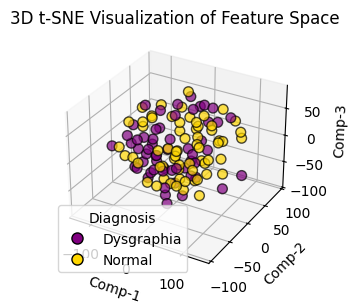

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# 1. Baca dataset
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

# 2. Hapus baris tanpa label diagnosis atau nilai count
df = df.dropna(subset=['diag', 'count'])

# 3. Ganti nilai 0 dan 1 pada kolom 'diag'
df['diag'] = df['diag'].replace({0: 'Normal', 1: 'Dysgraphia'})

# 4. Tentukan warna gold dan purple
colors_map = {'Normal': 'gold', 'Dysgraphia': 'purple'}

# 5. Kolom non-fitur
non_features = ['filename', 'age', 'sex', 'hand', 'count']

# 6. Pilih fitur dengan drop kolom non-fitur dan label
X = df.drop(columns=non_features + ['diag'])

y = df['diag']

# 7. Jalankan t-SNE 3D
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# 8. Visualisasi t-SNE 3D
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111, projection='3d')

colors = y.map(colors_map)

scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2],
                     c=colors, s=50, edgecolor='k', alpha=0.7)

ax.set_title('3D t-SNE Visualization of Feature Space', fontsize=12)
ax.set_xlabel('Comp-1')
ax.set_ylabel('Comp-2')
ax.set_zlabel('Comp-3')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Dysgraphia',
           markerfacecolor='purple', markersize=8, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Normal',
           markerfacecolor='gold', markersize=8, markeredgecolor='k')
]
ax.legend(handles=legend_elements, title='Diagnosis')

plt.tight_layout()
plt.show()


HISTOGRAM

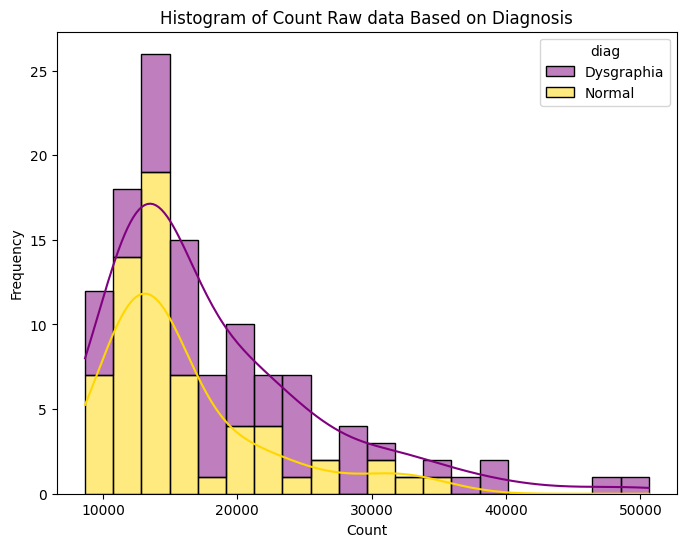

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Baca dataset ===
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

# === 2. Hapus baris tanpa label diagnosis atau nilai count ===
df = df.dropna(subset=['diag', 'count'])

# === 3. Ganti nilai 0 dan 1 pada kolom 'diag' ===
df['diag'] = df['diag'].replace({0: 'Normal', 1: 'Dysgraphia'})

# === 4. Tentukan warna gold dan purple ===
colors = {'Normal': 'gold', 'Dysgraphia': 'purple'}

# === 5. Plot histogram dengan garis lengkung berdasarkan 'count' dan 'diag' ===
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='count', hue='diag', multiple='stack', bins=20, edgecolor='black', kde=True, palette=colors)

# Menampilkan plot
plt.title('Histogram of Count Raw data Based on Diagnosis')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()


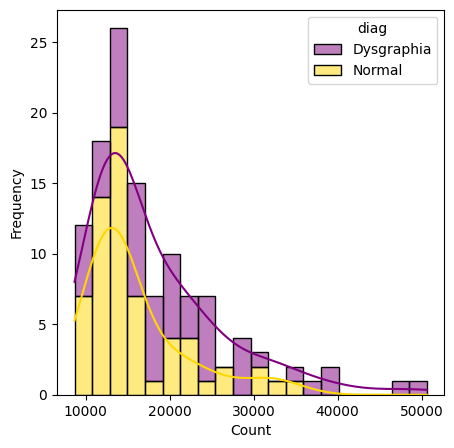

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Baca dataset ===
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

# === 2. Hapus baris tanpa label diagnosis atau nilai count ===
df = df.dropna(subset=['diag', 'count'])

# === 3. Ganti nilai 0 dan 1 pada kolom 'diag' ===
df['diag'] = df['diag'].replace({0: 'Normal', 1: 'Dysgraphia'})

# === 4. Tentukan warna gold dan purple ===
colors = {'Normal': 'gold', 'Dysgraphia': 'purple'}

# === 5. Plot histogram dengan garis lengkung berdasarkan 'count' dan 'diag' ===
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='count', hue='diag', multiple='stack', bins=20, edgecolor='black', kde=True, palette=colors)

# Menampilkan plot
#plt.title('Histogram of Count Raw data Based on Diagnosis')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()


FISHER CRITERION

/tmp/ipython-input-599356066.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='feature', data=top_25_fisher_scores, palette='viridis')


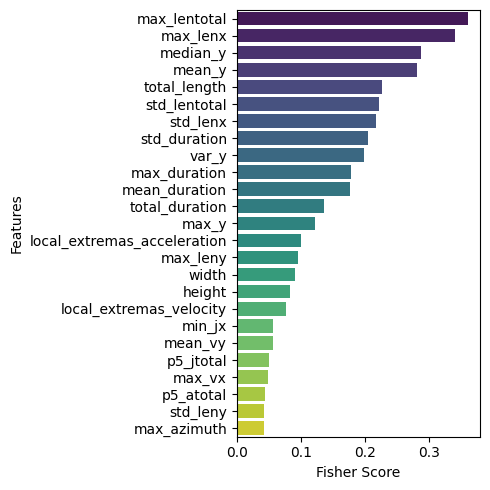

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Baca dataset ===
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

# === 2. Hapus kolom non-numerik dan non-fitur ===
non_features = ['filename', 'age', 'sex', 'hand', 'count']
df = df.drop(columns=[col for col in non_features if col in df.columns], errors='ignore')

# === 3. Drop baris tanpa label diagnosis ===
df = df.dropna(subset=['diag'])

# === 4. Pastikan 'diag' numerik ===
if df['diag'].dtype == object:
    df['diag'] = df['diag'].astype('category').cat.codes

# === 5. Pilih fitur numerik ===
feature_cols = [c for c in df.columns if c != 'diag' and np.issubdtype(df[c].dtype, np.number)]

# === 6. Fungsi Fisher Score ===
def fisher_score(feature, labels):
    classes = np.unique(labels)
    overall_mean = np.mean(feature)
    numerator = 0
    denominator = 0
    for c in classes:
        feature_c = feature[labels == c]
        n_c = len(feature_c)
        mean_c = np.mean(feature_c)
        var_c = np.var(feature_c)
        numerator += n_c * (mean_c - overall_mean)**2
        denominator += n_c * var_c
    if denominator == 0:
        return 0
    return numerator / denominator

# === 7. Hitung Fisher Score untuk semua fitur ===
fisher_scores = []
for f in feature_cols:
    score = fisher_score(df[f].values, df['diag'].values)
    fisher_scores.append({'feature': f, 'score': score})

# === 8. Convert hasil Fisher Score ke DataFrame ===
fisher_scores_df = pd.DataFrame(fisher_scores)

# === 9. Urutkan berdasarkan Fisher Score (terbesar ke terkecil) ===
fisher_scores_df = fisher_scores_df.sort_values(by='score', ascending=False)
# === 9. Urutkan berdasarkan Fisher Score (terkecil ke terbesar) ===
#fisher_scores_df = fisher_scores_df.sort_values(by='score', ascending=True)

# === 10. Ambil 25 fitur terbaik ===
top_25_fisher_scores = fisher_scores_df.head(25)

# === 11. Visualisasi dengan Bar Plot ===
plt.figure(figsize=(5,5))
sns.barplot(x='score', y='feature', data=top_25_fisher_scores, palette='viridis')

# === 12. Tambahkan label dan judul ===
plt.xlabel('Fisher Score')
plt.ylabel('Features')
#plt.title('Top 25 Features Based on Fisher Score')
#plt.title('Bottom 25 Features Based on Fisher Score')
plt.tight_layout()

# === 13. Tampilkan plot ===
plt.show()


ADAPTIF FISHER BASED HILL-CLIMBING

KOMPARASI KERNEL SVM


Evaluating SVM with kernel: linear
> Menambahkan fitur: max_lentotal
  Jumlah fitur sekarang: 1 | CV Akurasi: 0.7225
> Menambahkan fitur: max_lenx
  Jumlah fitur sekarang: 2 | CV Akurasi: 0.7225
> Menambahkan fitur: median_y
  Jumlah fitur sekarang: 3 | CV Akurasi: 0.7902
> Menambahkan fitur: mean_y
  Jumlah fitur sekarang: 4 | CV Akurasi: 0.8322
> Menambahkan fitur: total_length
  Jumlah fitur sekarang: 5 | CV Akurasi: 0.8489
> Menambahkan fitur: std_lentotal
  Jumlah fitur sekarang: 6 | CV Akurasi: 0.8319
> Menambahkan fitur: std_lenx
  Jumlah fitur sekarang: 7 | CV Akurasi: 0.8236
> Menambahkan fitur: std_duration
  Jumlah fitur sekarang: 8 | CV Akurasi: 0.8493
> Menambahkan fitur: var_y
  Jumlah fitur sekarang: 9 | CV Akurasi: 0.8406
> Menambahkan fitur: max_duration
  Jumlah fitur sekarang: 10 | CV Akurasi: 0.8406
> Menambahkan fitur: mean_duration
  Jumlah fitur sekarang: 11 | CV Akurasi: 0.8489
> Menambahkan fitur: total_duration
  Jumlah fitur sekarang: 12 | CV Akurasi: 0.8402

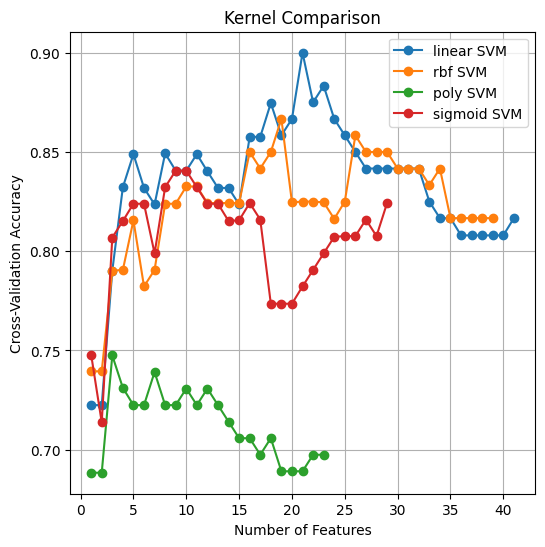

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# === 1. Baca dataset ===
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

# === 2. Hapus kolom non-numerik dan non-fitur ===
non_features = ['filename', 'age', 'sex', 'hand', 'count']
df = df.drop(columns=[col for col in non_features if col in df.columns], errors='ignore')

# === 3. Drop baris tanpa label diagnosis ===
df = df.dropna(subset=['diag'])

# === 4. Pastikan 'diag' numerik ===
if df['diag'].dtype == object:
    df['diag'] = df['diag'].astype('category').cat.codes

# === 5. Pilih fitur numerik (selain target) ===
feature_cols = [c for c in df.columns if c != 'diag' and np.issubdtype(df[c].dtype, np.number)]

# === 6. Fungsi Fisher Score ===
def fisher_score(feature, labels):
    classes = np.unique(labels)
    overall_mean = np.mean(feature)
    numerator = 0
    denominator = 0
    for c in classes:
        feature_c = feature[labels == c]
        n_c = len(feature_c)
        mean_c = np.mean(feature_c)
        var_c = np.var(feature_c)
        numerator += n_c * (mean_c - overall_mean)**2
        denominator += n_c * var_c
    if denominator == 0:
        return 0
    return numerator / denominator

# === 7. Hitung Fisher Score untuk semua fitur ===
fisher_scores = []
for f in feature_cols:
    score = fisher_score(df[f].values, df['diag'].values)
    fisher_scores.append({'feature': f, 'score': score})

fisher_df = pd.DataFrame(fisher_scores).sort_values(by='score', ascending=False)
sorted_features = fisher_df['feature'].tolist()

# === 8. Seleksi Fitur Adaptif berdasarkan Fisher Hill Climbing (FHC) dan SVM Model ===
kernels = ['linear', 'rbf', 'poly', 'sigmoid']  # List of SVM kernel types
best_results = {}

for kernel in kernels:
    print(f"\nEvaluating SVM with kernel: {kernel}")

    best_acc = 0.0
    best_features = []
    no_improve_count = 0
    max_no_improve = 20

    acc_list = []
    selected_features = []

    prev_accuracy = -np.inf  # Initializing previous accuracy for comparison

    # Fisher Hill Climbing - iterasi untuk memilih fitur terbaik berdasarkan Fisher Score
    for feat in sorted_features:
        selected_features.append(feat)

        X = df[selected_features]
        y = df['diag']

        # Standarisasi untuk SVM
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Latih SVM dengan kernel yang dipilih
        model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)

        # Cross-validation menggunakan StratifiedKFold
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')

        mean_cv_score = np.mean(cv_scores)
        acc_list.append(mean_cv_score)

        print(f"> Menambahkan fitur: {feat}")
        print(f"  Jumlah fitur sekarang: {len(selected_features)} | CV Akurasi: {mean_cv_score:.4f}")

        # Cek peningkatan akurasi
        if mean_cv_score > best_acc:
            best_acc = mean_cv_score
            best_features = selected_features.copy()
            no_improve_count = 0
        elif mean_cv_score == best_acc:
            if len(selected_features) < len(best_features):
                best_features = selected_features.copy()
            no_improve_count += 1
        else:
            no_improve_count += 1

        if no_improve_count >= max_no_improve:
            print("⛔ Akurasi tidak meningkat selama", max_no_improve, "iterasi. Proses dihentikan.")
            break

    best_results[kernel] = {
        'best_features': best_features,
        'best_accuracy': best_acc,
        'acc_list': acc_list
    }

    # === 9. Menghitung Metrik Evaluasi Lengkap (Akurasi, Precision, Recall, F1-Score) ===
    model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)

    # Menampilkan Classification Report untuk setiap kernel
    print(f"\nClassification Report for {kernel} SVM:")
    print(classification_report(y, y_pred))

# === 10. Tampilkan Hasil Seleksi untuk setiap model SVM ===
for kernel in kernels:
    print(f"\n✅ Hasil Seleksi Fitur untuk {kernel} SVM selesai.")
    print(f"Fitur terbaik untuk {kernel}:")
    print(best_results[kernel]['best_features'])
    print(f"Akurasi terbaik untuk {kernel}: {round(best_results[kernel]['best_accuracy'], 4)}")

# === 11. Visualisasi Akurasi untuk Semua Model ===
plt.figure(figsize=(6, 6))
for kernel in kernels:
    plt.plot(range(1, len(best_results[kernel]['acc_list']) + 1), best_results[kernel]['acc_list'], marker='o', linestyle='-', label=f'{kernel} SVM')

plt.title('Kernel Comparison')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Komparasi plateau


🔁 Kernel: linear | max_no_improve = 5
⛔ Plateau reached (5). Stop.

🔁 Kernel: linear | max_no_improve = 10
⛔ Plateau reached (10). Stop.

🔁 Kernel: linear | max_no_improve = 15
⛔ Plateau reached (15). Stop.

🔁 Kernel: linear | max_no_improve = 20
⛔ Plateau reached (20). Stop.

🔁 Kernel: linear | max_no_improve = 25
⛔ Plateau reached (25). Stop.


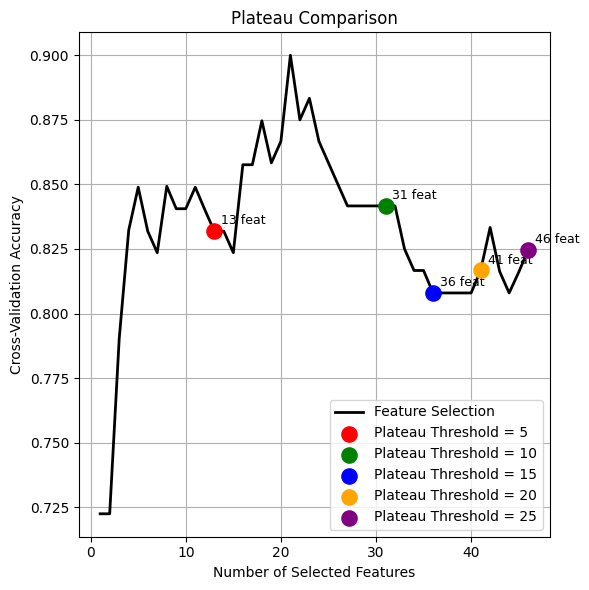

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# =========================
# 1. Load Dataset
# =========================
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

# =========================
# 2. Drop non-feature columns
# =========================
non_features = ['filename', 'age', 'sex', 'hand', 'count']
df = df.drop(columns=[c for c in non_features if c in df.columns], errors='ignore')

# =========================
# 3. Drop rows without label
# =========================
df = df.dropna(subset=['diag'])

# =========================
# 4. Encode label if needed
# =========================
if df['diag'].dtype == object:
    df['diag'] = df['diag'].astype('category').cat.codes

# =========================
# 5. Select numeric feature columns
# =========================
feature_cols = [
    c for c in df.columns
    if c != 'diag' and np.issubdtype(df[c].dtype, np.number)
]

# =========================
# 6. Fisher Score Function
# =========================
def fisher_score(feature, labels):
    classes = np.unique(labels)
    overall_mean = np.mean(feature)
    numerator, denominator = 0.0, 0.0

    for c in classes:
        feature_c = feature[labels == c]
        n_c = len(feature_c)
        mean_c = np.mean(feature_c)
        var_c = np.var(feature_c)

        numerator += n_c * (mean_c - overall_mean) ** 2
        denominator += n_c * var_c

    return 0 if denominator == 0 else numerator / denominator

# =========================
# 7. Compute Fisher Scores
# =========================
fisher_scores = []
for f in feature_cols:
    fisher_scores.append({
        'feature': f,
        'score': fisher_score(df[f].values, df['diag'].values)
    })

fisher_df = pd.DataFrame(fisher_scores).sort_values(by='score', ascending=False)
sorted_features = fisher_df['feature'].tolist()

# =========================
# 8. Fisher Hill Climbing + SVM
# =========================
kernels = ['linear']
max_no_improve_list = [5, 10, 15, 20, 25]
best_results = {}

for kernel in kernels:
    for max_no_improve in max_no_improve_list:
        print(f"\n🔁 Kernel: {kernel} | max_no_improve = {max_no_improve}")

        best_acc = 0.0
        best_features = []
        no_improve_count = 0

        acc_list = []
        feature_count_list = []
        selected_features = []

        for feat in sorted_features:
            selected_features.append(feat)

            X = df[selected_features]
            y = df['diag']

            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)

            model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

            mean_cv_score = np.mean(
                cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
            )

            acc_list.append(mean_cv_score)
            feature_count_list.append(len(selected_features))

            if mean_cv_score > best_acc:
                best_acc = mean_cv_score
                best_features = selected_features.copy()
                no_improve_count = 0
            else:
                no_improve_count += 1

            if no_improve_count >= max_no_improve:
                print(f"⛔ Plateau reached ({max_no_improve}). Stop.")
                break

        best_results[(kernel, max_no_improve)] = {
            'best_features': best_features,
            'best_accuracy': best_acc,
            'acc_list': acc_list,
            'feature_list': feature_count_list
        }

# =========================
# 9. Final Evaluation (Training Set)
# =========================
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# ambil satu kurva referensi (plateau terbesar)
ref_result = best_results[('linear', 25)]
plt.plot(
    ref_result['feature_list'],
    ref_result['acc_list'],
    color='black',
    linewidth=2,
    label='Feature Selection'
)

colors = {
    5: 'red',
    10: 'green',
    15: 'blue',
    20: 'orange',
    25: 'purple'
}

# plot titik BERHENTI tiap plateau
for plateau, color in colors.items():
    result = best_results[('linear', plateau)]

    x_stop = result['feature_list'][-1]
    y_stop = result['acc_list'][-1]

    plt.scatter(
        x_stop,
        y_stop,
        color=color,
        s=120,
        zorder=5,
        label=f'Plateau Threshold = {plateau}'
    )

    plt.annotate(
        f'{x_stop} feat',
        (x_stop, y_stop),
        textcoords='offset points',
        xytext=(5, 5),
        fontsize=9
    )

plt.xlabel('Number of Selected Features')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Plateau Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

komparasi machine learning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# === 1. Load data dan preprocessing ===
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

non_features = ['filename', 'age', 'sex', 'hand', 'count']
df = df.drop(columns=[col for col in non_features if col in df.columns], errors='ignore')
df = df.dropna(subset=['diag'])
if df['diag'].dtype == object:
    df['diag'] = df['diag'].astype('category').cat.codes
feature_cols = [c for c in df.columns if c != 'diag' and np.issubdtype(df[c].dtype, np.number)]

# === 2. Fisher Score function ===
def fisher_score(feature, labels):
    classes = np.unique(labels)
    overall_mean = np.mean(feature)
    numerator = 0
    denominator = 0
    for c in classes:
        feature_c = feature[labels == c]
        n_c = len(feature_c)
        mean_c = np.mean(feature_c)
        var_c = np.var(feature_c)
        numerator += n_c * (mean_c - overall_mean)**2
        denominator += n_c * var_c
    if denominator == 0:
        return 0
    return numerator / denominator

# === 3. Hitung Fisher Score semua fitur ===
fisher_scores = []
for f in feature_cols:
    score = fisher_score(df[f].values, df['diag'].values)
    fisher_scores.append({'feature': f, 'score': score})
fisher_df = pd.DataFrame(fisher_scores).sort_values(by='score', ascending=False)
sorted_features = fisher_df['feature'].tolist()

# === 4. Fungsi seleksi fitur Hill Climbing ===
def fisher_hill_climbing(df, sorted_features, model, model_name=''):
    best_acc = 0
    best_features = []
    no_improve_count = 0
    max_no_improve = 20
    acc_list = []
    selected_features = []
    X_full = df[sorted_features]
    y = df['diag'].values

    for feat in sorted_features:
        selected_features.append(feat)
        X = df[selected_features].values

        # Standarisasi untuk SVM dan KNN
        if model_name in ['svm', 'knn']:
            scaler = StandardScaler()
            X = scaler.fit_transform(X)

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        mean_cv_score = np.mean(cv_scores)
        acc_list.append(mean_cv_score)

        print(f"[{model_name}] Menambahkan fitur: {feat} | CV Acc: {mean_cv_score:.4f}")

        if mean_cv_score > best_acc:
            best_acc = mean_cv_score
            best_features = selected_features.copy()
            no_improve_count = 0
        else:
            no_improve_count += 1

        if no_improve_count >= max_no_improve:
            print(f"⛔ Akurasi tidak meningkat selama {max_no_improve} iterasi. Stop.")
            break

    return best_features, best_acc, acc_list

# === 5. Definisikan model-model ===
models_to_run = {
    'svm_linear': SVC(kernel='linear', random_state=42, C=1.0),
    'random_forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'adaboost': AdaBoostClassifier(n_estimators=200, random_state=42),
    'knn_euclidean_5': KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
    'knn_euclidean_10': KNeighborsClassifier(n_neighbors=10, metric='euclidean'),
    'knn_manhattan_5': KNeighborsClassifier(n_neighbors=5, metric='manhattan'),
    'knn_manhattan_10': KNeighborsClassifier(n_neighbors=10, metric='manhattan'),
    'decision_tree_none': DecisionTreeClassifier(max_depth=None, random_state=42),
    'decision_tree_5': DecisionTreeClassifier(max_depth=5, random_state=42),
    'decision_tree_10': DecisionTreeClassifier(max_depth=10, random_state=42),
    'gradient_boosting_lr_0.1': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'gradient_boosting_lr_0.01': GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, random_state=42),
    'gaussian_nb': GaussianNB(var_smoothing=1e-9),
    'gaussian_process_rbf': GaussianProcessClassifier(kernel=RBF(), random_state=42)
}

# === 6. Jalankan Fisher Hill Climbing dan tampilkan classification report dengan cross_val_predict ===
best_results = {}

for name, mdl in models_to_run.items():
    print(f"\n=== Evaluasi model: {name} ===")
    best_f, best_a, acc_l = fisher_hill_climbing(df, sorted_features, mdl, model_name=name.split('_')[0])
    best_results[name] = {
        'best_features': best_f,
        'best_accuracy': best_a,
        'acc_list': acc_l
    }

    X = df[best_f].values
    y = df['diag'].values

    # Standardisasi jika perlu
    if name.split('_')[0] in ['svm', 'knn']:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # Prediksi menggunakan cross_val_predict supaya classification report valid
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred_cv = cross_val_predict(mdl, X, y, cv=cv)

    print(f"\nClassification Report untuk {name} dengan fitur terbaik (cross-validation):")
    print(classification_report(y, y_pred_cv))

# === 7. Summary hasil ===
print("\n\n=== Summary Best Results ===")
for k, v in best_results.items():
    print(f"Model: {k}")
    print(f" - Jumlah fitur terbaik: {len(v['best_features'])}")
    print(f" - Akurasi terbaik (CV): {v['best_accuracy']:.4f}")
    print(f" - Fitur terbaik: {v['best_features']}\n")



=== Evaluasi model: svm_linear ===
[svm] Menambahkan fitur: max_lentotal | CV Acc: 0.7225
[svm] Menambahkan fitur: max_lenx | CV Acc: 0.7225
[svm] Menambahkan fitur: median_y | CV Acc: 0.7902
[svm] Menambahkan fitur: mean_y | CV Acc: 0.8322
[svm] Menambahkan fitur: total_length | CV Acc: 0.8489
[svm] Menambahkan fitur: std_lentotal | CV Acc: 0.8319
[svm] Menambahkan fitur: std_lenx | CV Acc: 0.8236
[svm] Menambahkan fitur: std_duration | CV Acc: 0.8493
[svm] Menambahkan fitur: var_y | CV Acc: 0.8406
[svm] Menambahkan fitur: max_duration | CV Acc: 0.8406
[svm] Menambahkan fitur: mean_duration | CV Acc: 0.8489
[svm] Menambahkan fitur: total_duration | CV Acc: 0.8402
[svm] Menambahkan fitur: max_y | CV Acc: 0.8319
[svm] Menambahkan fitur: local_extremas_acceleration | CV Acc: 0.8319
[svm] Menambahkan fitur: max_leny | CV Acc: 0.8236
[svm] Menambahkan fitur: width | CV Acc: 0.8576
[svm] Menambahkan fitur: height | CV Acc: 0.8576
[svm] Menambahkan fitur: local_extremas_velocity | CV Acc: 0

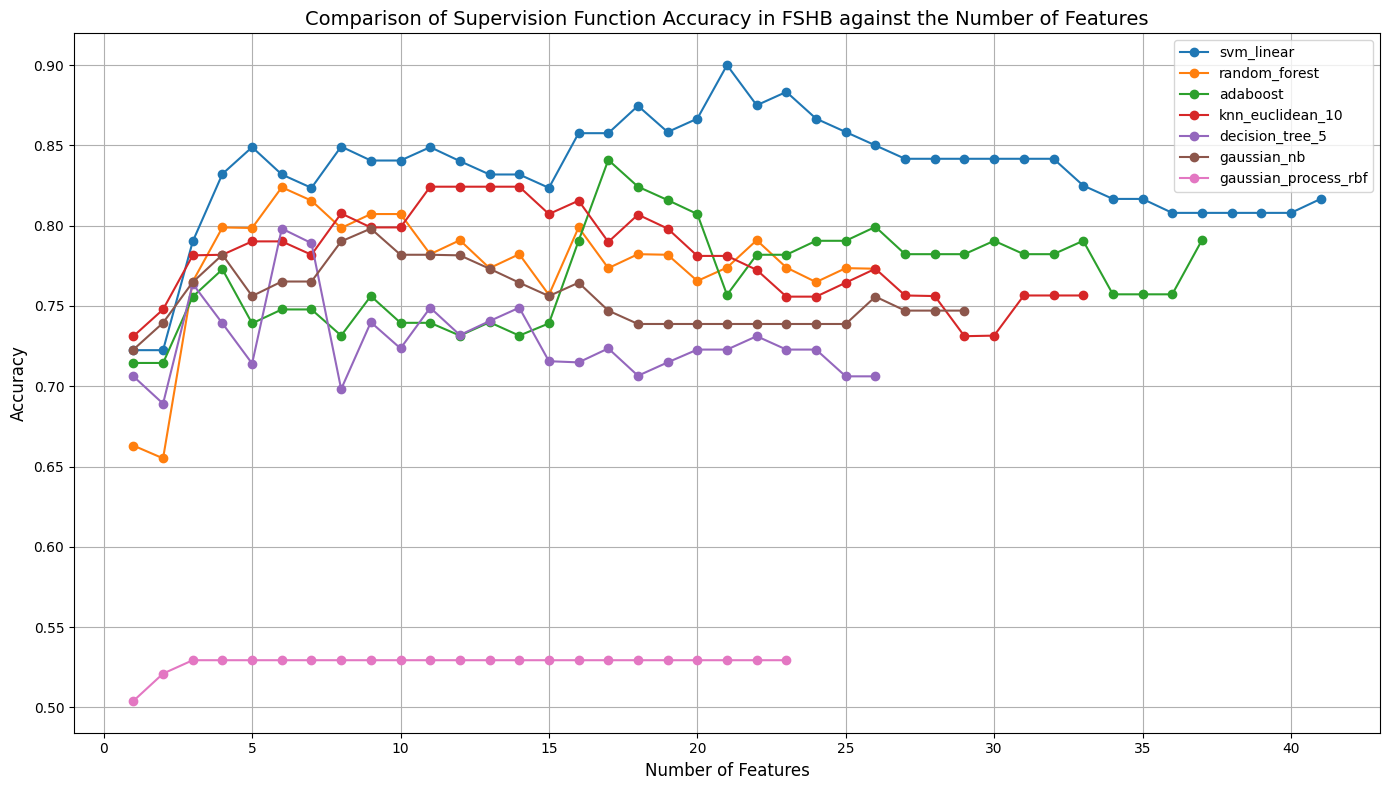

In [ ]:
import matplotlib.pyplot as plt

# Pilih model yang ingin divisualisasikan (bisa semua atau sebagian)
models_to_plot = [
    'svm_linear',
    'random_forest',
    'adaboost',
    'knn_euclidean_10',
    'decision_tree_5',
    'gaussian_nb',
    'gaussian_process_rbf'
]

plt.figure(figsize=(14, 8))

for model_name in models_to_plot:
    if model_name in best_results:
        acc_list = best_results[model_name]['acc_list']
        num_features = list(range(1, len(acc_list) + 1))
        plt.plot(num_features, acc_list, marker='o', label=model_name)

plt.title("Comparison of Supervision Function Accuracy in FSHB against the Number of Features", fontsize=14)
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


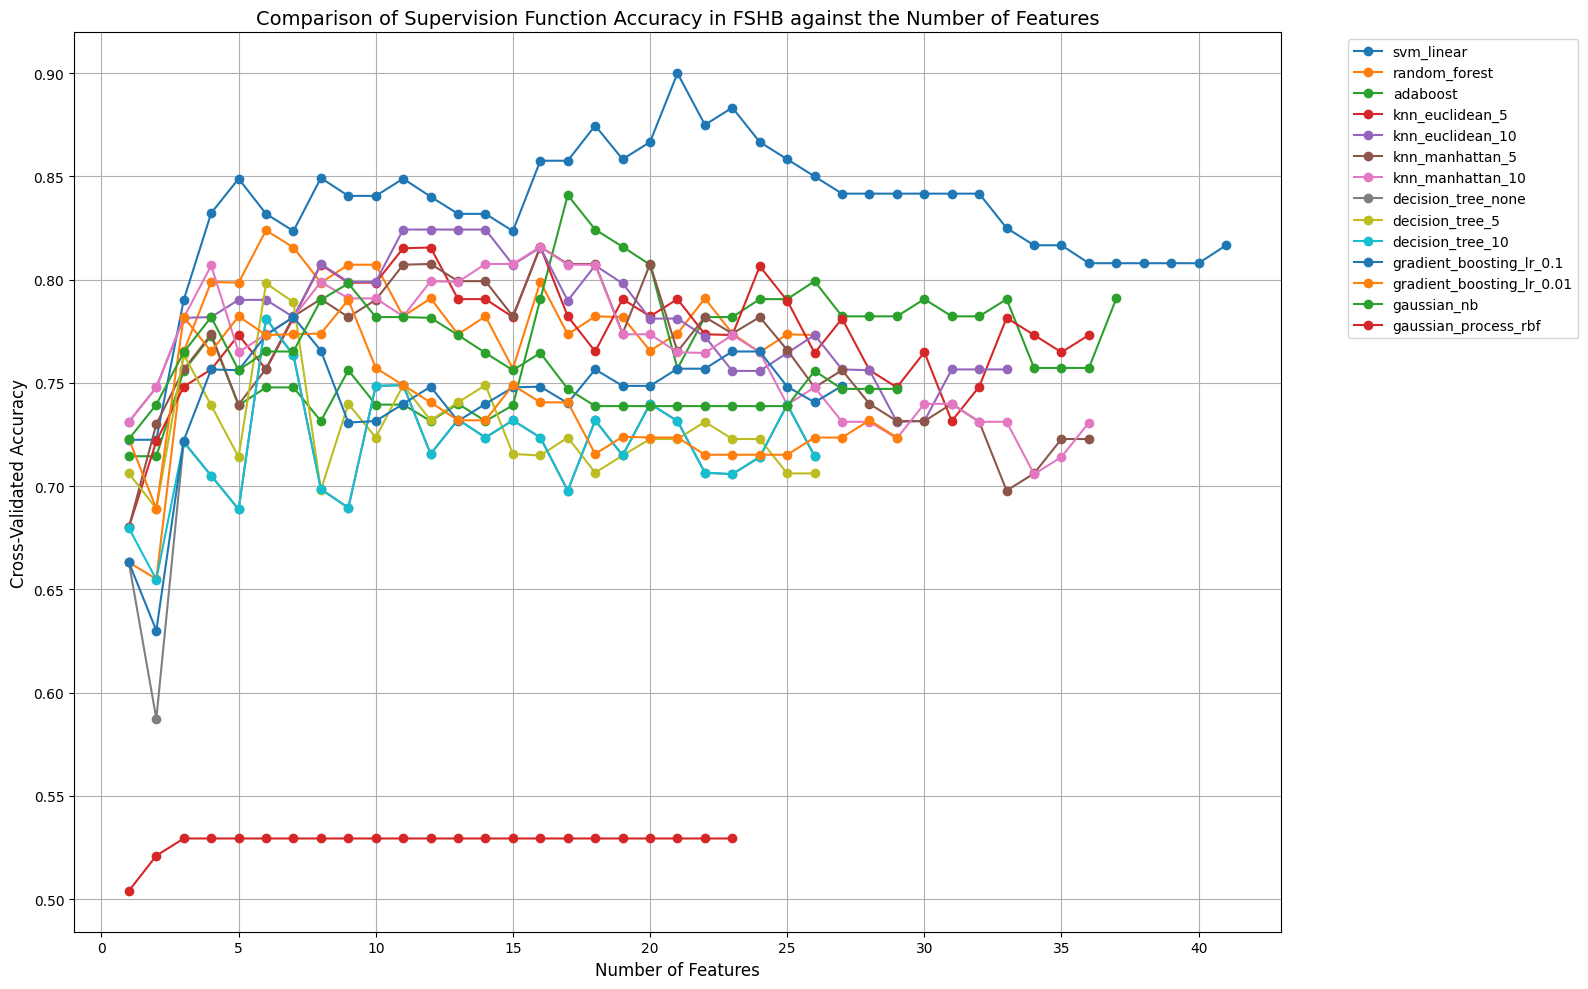

In [ ]:
import matplotlib.pyplot as plt

# Ambil semua model dari models_to_run
models_to_plot = list(models_to_run.keys())

plt.figure(figsize=(16, 10))

for model_name in models_to_plot:
    if model_name in best_results:
        acc_list = best_results[model_name]['acc_list']
        num_features = list(range(1, len(acc_list) + 1))
        plt.plot(num_features, acc_list, marker='o', label=model_name)

plt.title("Comparison of Supervision Function Accuracy in FSHB against the Number of Features", fontsize=14)
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("Cross-Validated Accuracy", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend di luar plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# === 1. Load data dan preprocessing ===
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

non_features = ['filename', 'age', 'sex', 'hand', 'count']
df = df.drop(columns=[col for col in non_features if col in df.columns], errors='ignore')
df = df.dropna(subset=['diag'])
if df['diag'].dtype == object:
    df['diag'] = df['diag'].astype('category').cat.codes
feature_cols = [c for c in df.columns if c != 'diag' and np.issubdtype(df[c].dtype, np.number)]

# === 2. Fisher Score function ===
def fisher_score(feature, labels):
    classes = np.unique(labels)
    overall_mean = np.mean(feature)
    numerator = 0
    denominator = 0
    for c in classes:
        feature_c = feature[labels == c]
        n_c = len(feature_c)
        mean_c = np.mean(feature_c)
        var_c = np.var(feature_c)
        numerator += n_c * (mean_c - overall_mean)**2
        denominator += n_c * var_c
    if denominator == 0:
        return 0
    return numerator / denominator

# === 3. Hitung Fisher Score semua fitur ===
fisher_scores = []
for f in feature_cols:
    score = fisher_score(df[f].values, df['diag'].values)
    fisher_scores.append({'feature': f, 'score': score})
fisher_df = pd.DataFrame(fisher_scores).sort_values(by='score', ascending=False)
sorted_features = fisher_df['feature'].tolist()

# === 4. Fungsi seleksi fitur Hill Climbing ===
def fisher_hill_climbing(df, sorted_features, model, model_name=''):
    best_acc = 0
    best_features = []
    no_improve_count = 0
    max_no_improve = 20
    acc_list = []
    selected_features = []
    X_full = df[sorted_features]
    y = df['diag'].values

    for feat in sorted_features:
        selected_features.append(feat)
        X = df[selected_features].values

        # Standarisasi untuk SVM dan KNN
        if model_name in ['svm', 'knn']:
            scaler = StandardScaler()
            X = scaler.fit_transform(X)

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        mean_cv_score = np.mean(cv_scores)
        acc_list.append(mean_cv_score)

        print(f"[{model_name}] Menambahkan fitur: {feat} | CV Acc: {mean_cv_score:.4f}")

        if mean_cv_score > best_acc:
            best_acc = mean_cv_score
            best_features = selected_features.copy()
            no_improve_count = 0
        else:
            no_improve_count += 1

        if no_improve_count >= max_no_improve:
            print(f"⛔ Akurasi tidak meningkat selama {max_no_improve} iterasi. Stop.")
            break

    return best_features, best_acc, acc_list

# === 5. Definisikan model-model ===
models_to_run = {
    'svm_linear': SVC(kernel='linear', random_state=42, C=1.0),
    'random_forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'adaboost': AdaBoostClassifier(n_estimators=200, random_state=42),
    'knn_euclidean_5': KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
    'knn_euclidean_10': KNeighborsClassifier(n_neighbors=10, metric='euclidean'),
    'knn_manhattan_5': KNeighborsClassifier(n_neighbors=5, metric='manhattan'),
    'knn_manhattan_10': KNeighborsClassifier(n_neighbors=10, metric='manhattan'),
    'decision_tree_none': DecisionTreeClassifier(max_depth=None, random_state=42),
    'decision_tree_5': DecisionTreeClassifier(max_depth=5, random_state=42),
    'decision_tree_10': DecisionTreeClassifier(max_depth=10, random_state=42),
    'gradient_boosting_lr_0.1': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'gradient_boosting_lr_0.01': GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, random_state=42),
    'gaussian_nb': GaussianNB(var_smoothing=1e-9),
    'gaussian_process_rbf': GaussianProcessClassifier(kernel=RBF(), random_state=42)
}

# === 6. Jalankan Fisher Hill Climbing dan tampilkan classification report dengan cross_val_predict ===
best_results = {}

for name, mdl in models_to_run.items():
    print(f"\n=== Evaluasi model: {name} ===")
    best_f, best_a, acc_l = fisher_hill_climbing(df, sorted_features, mdl, model_name=name.split('_')[0])
    best_results[name] = {
        'best_features': best_f,
        'best_accuracy': best_a,
        'acc_list': acc_l
    }

    X = df[best_f].values
    y = df['diag'].values

    # Standardisasi jika perlu
    if name.split('_')[0] in ['svm', 'knn']:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # Prediksi menggunakan cross_val_predict supaya classification report valid
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_pred_cv = cross_val_predict(mdl, X, y, cv=cv)

    print(f"\nClassification Report untuk {name} dengan fitur terbaik (cross-validation):")
    print(classification_report(y, y_pred_cv))

# === 7. Summary hasil ===
print("\n\n=== Summary Best Results ===")
for k, v in best_results.items():
    print(f"Model: {k}")
    print(f" - Jumlah fitur terbaik: {len(v['best_features'])}")
    print(f" - Akurasi terbaik (CV): {v['best_accuracy']:.4f}")
    print(f" - Fitur terbaik: {v['best_features']}\n")



=== Evaluasi model: svm_linear ===
[svm] Menambahkan fitur: max_lentotal | CV Acc: 0.7225
[svm] Menambahkan fitur: max_lenx | CV Acc: 0.7225
[svm] Menambahkan fitur: median_y | CV Acc: 0.7902
[svm] Menambahkan fitur: mean_y | CV Acc: 0.8322
[svm] Menambahkan fitur: total_length | CV Acc: 0.8489
[svm] Menambahkan fitur: std_lentotal | CV Acc: 0.8319
[svm] Menambahkan fitur: std_lenx | CV Acc: 0.8236
[svm] Menambahkan fitur: std_duration | CV Acc: 0.8493
[svm] Menambahkan fitur: var_y | CV Acc: 0.8406
[svm] Menambahkan fitur: max_duration | CV Acc: 0.8406
[svm] Menambahkan fitur: mean_duration | CV Acc: 0.8489
[svm] Menambahkan fitur: total_duration | CV Acc: 0.8402
[svm] Menambahkan fitur: max_y | CV Acc: 0.8319
[svm] Menambahkan fitur: local_extremas_acceleration | CV Acc: 0.8319
[svm] Menambahkan fitur: max_leny | CV Acc: 0.8236
[svm] Menambahkan fitur: width | CV Acc: 0.8576
[svm] Menambahkan fitur: height | CV Acc: 0.8576
[svm] Menambahkan fitur: local_extremas_velocity | CV Acc: 0

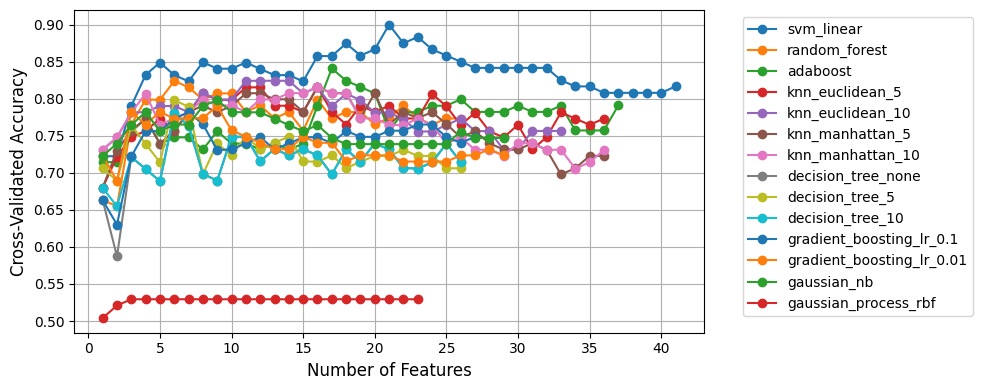

In [ ]:
import matplotlib.pyplot as plt

# Ambil semua model dari models_to_run
models_to_plot = list(models_to_run.keys())

plt.figure(figsize=(10, 4))

for model_name in models_to_plot:
    if model_name in best_results:
        acc_list = best_results[model_name]['acc_list']
        num_features = list(range(1, len(acc_list) + 1))
        plt.plot(num_features, acc_list, marker='o', label=model_name)

#plt.title("Comparison of Supervision Function Accuracy in FSHB against the Number of Features", fontsize=14)
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("Cross-Validated Accuracy", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend di luar plot
plt.grid(True)
plt.tight_layout()
plt.show()


SVM (POLY)

> Menambahkan fitur: max_lentotal
  Jumlah fitur sekarang: 1 | Akurasi: 0.5833
> Menambahkan fitur: max_lenx
  Jumlah fitur sekarang: 2 | Akurasi: 0.5833
> Menambahkan fitur: median_y
  Jumlah fitur sekarang: 3 | Akurasi: 0.7222
> Menambahkan fitur: mean_y
  Jumlah fitur sekarang: 4 | Akurasi: 0.7778
> Menambahkan fitur: total_length
  Jumlah fitur sekarang: 5 | Akurasi: 0.8056
> Menambahkan fitur: std_lentotal
  Jumlah fitur sekarang: 6 | Akurasi: 0.7222
> Menambahkan fitur: std_lenx
  Jumlah fitur sekarang: 7 | Akurasi: 0.7222
> Menambahkan fitur: std_duration
  Jumlah fitur sekarang: 8 | Akurasi: 0.7778
> Menambahkan fitur: var_y
  Jumlah fitur sekarang: 9 | Akurasi: 0.7500
⛔ Akurasi tidak meningkat selama 4 iterasi. Proses dihentikan.

✅ Seleksi Fitur Fisher selesai.
Fitur terbaik:
['max_lentotal', 'max_lenx', 'median_y', 'mean_y', 'total_length']
Akurasi terbaik: 0.8056

=== Classification Report Akhir ===
              precision    recall  f1-score   support

         0.0       0

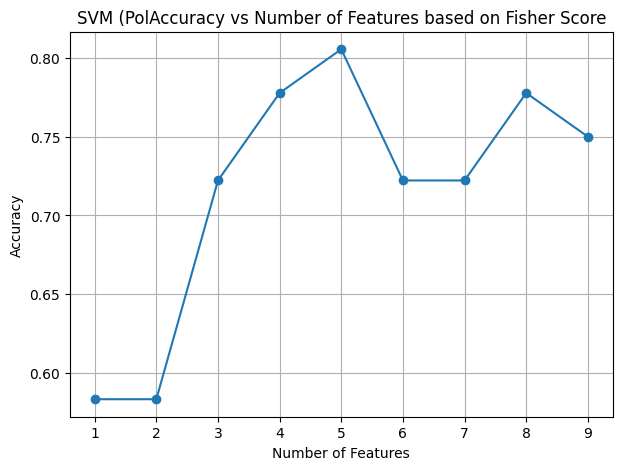

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

# === 1. Baca dataset ===
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

# === 2. Hapus kolom non-numerik dan non-fitur ===
non_features = ['filename', 'age', 'sex', 'hand', 'count']
df = df.drop(columns=[col for col in non_features if col in df.columns], errors='ignore')

# === 3. Drop baris tanpa label diagnosis ===
df = df.dropna(subset=['diag'])

# === 4. Pastikan 'diag' numerik ===
if df['diag'].dtype == object:
    df['diag'] = df['diag'].astype('category').cat.codes

# === 5. Pilih fitur numerik (selain target) ===
feature_cols = [c for c in df.columns if c != 'diag' and np.issubdtype(df[c].dtype, np.number)]

# === 6. Fungsi Fisher Score ===
def fisher_score(feature, labels):
    classes = np.unique(labels)
    overall_mean = np.mean(feature)
    numerator = 0
    denominator = 0
    for c in classes:
        feature_c = feature[labels == c]
        n_c = len(feature_c)
        mean_c = np.mean(feature_c)
        var_c = np.var(feature_c)
        numerator += n_c * (mean_c - overall_mean)**2
        denominator += n_c * var_c
    if denominator == 0:
        return 0
    return numerator / denominator

# === 7. Hitung Fisher Score untuk semua fitur ===
fisher_scores = []
for f in feature_cols:
    score = fisher_score(df[f].values, df['diag'].values)
    fisher_scores.append({'feature': f, 'score': score})

fisher_df = pd.DataFrame(fisher_scores).sort_values(by='score', ascending=False)
sorted_features = fisher_df['feature'].tolist()

# === 8. Seleksi Fitur Adaptif berdasarkan Fisher Score ===
best_acc = 0.0
best_features = []
no_improve_count = 0
max_no_improve = 4

acc_list = []
features_history = []

selected_features = []

for feat in sorted_features:
    selected_features.append(feat)
    features_history.append(selected_features.copy())

    X = df[selected_features]
    y = df['diag']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Standarisasi untuk SVM
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Latih SVM
    model = SVC(kernel='poly', degree=3, gamma='scale', coef0=1, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

    print(f"> Menambahkan fitur: {feat}")
    print(f"  Jumlah fitur sekarang: {len(selected_features)} | Akurasi: {acc:.4f}")

    # Cek peningkatan akurasi
    if acc > best_acc:
        best_acc = acc
        best_features = selected_features.copy()
        no_improve_count = 0
    elif acc == best_acc:
        if len(selected_features) < len(best_features):
            best_features = selected_features.copy()
        no_improve_count += 1
    else:
        no_improve_count += 1

    if no_improve_count >= max_no_improve:
        print("⛔ Akurasi tidak meningkat selama", max_no_improve, "iterasi. Proses dihentikan.")
        break

# === 9. Tampilkan Hasil Seleksi ===
print("\n✅ Seleksi Fitur Fisher selesai.")
print("Fitur terbaik:")
print(best_features)
print("Akurasi terbaik:", round(best_acc, 4))

# === 10. Evaluasi akhir dengan fitur terbaik ===
X_final = df[best_features]
y = df['diag']
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_final = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_final.fit(X_train_scaled, y_train)
y_pred_final = svm_final.predict(X_test_scaled)

print("\n=== Classification Report Akhir ===")
print(classification_report(y_test, y_pred_final))

# === 11. Visualisasi Akurasi ===
plt.figure(figsize=(7,5))
plt.plot(range(1, len(acc_list)+1), acc_list, marker='o', linestyle='-')
plt.title('SVM (PolAccuracy vs Number of Features based on Fisher Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

> Menambahkan fitur: max_lentotal
  Jumlah fitur sekarang: 1 | Akurasi: 0.8056
> Menambahkan fitur: max_lenx
  Jumlah fitur sekarang: 2 | Akurasi: 0.8056
> Menambahkan fitur: median_y
  Jumlah fitur sekarang: 3 | Akurasi: 0.8056
⛔ Akurasi tidak meningkat selama 2 iterasi. Proses dihentikan.

✅ Seleksi Fitur Fisher selesai.
Fitur terbaik:
['max_lentotal']
Akurasi terbaik: 0.8056

=== Classification Report Akhir ===
              precision    recall  f1-score   support

         0.0       0.57      0.84      0.68        19
         1.0       0.62      0.29      0.40        17

    accuracy                           0.58        36
   macro avg       0.60      0.57      0.54        36
weighted avg       0.60      0.58      0.55        36



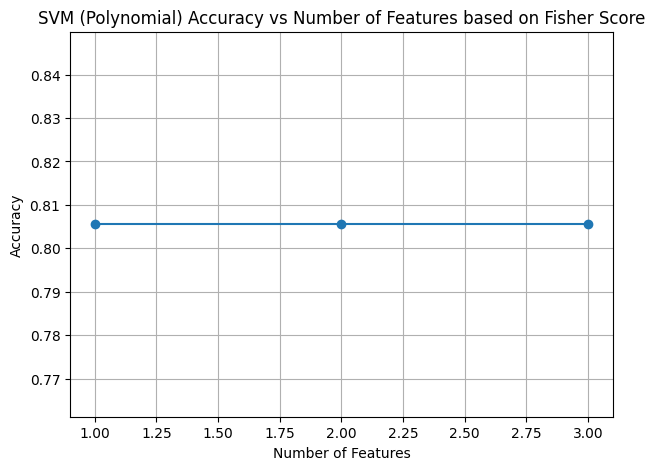

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

# === 1. Baca dataset ===
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

# === 2. Hapus kolom non-numerik dan non-fitur ===
non_features = ['filename', 'age', 'sex', 'hand', 'count']
df = df.drop(columns=[col for col in non_features if col in df.columns], errors='ignore')

# === 3. Drop baris tanpa label diagnosis ===
df = df.dropna(subset=['diag'])

# === 4. Pastikan 'diag' numerik ===
if df['diag'].dtype == object:
    df['diag'] = df['diag'].astype('category').cat.codes

# === 5. Pilih fitur numerik (selain target) ===
feature_cols = [c for c in df.columns if c != 'diag' and np.issubdtype(df[c].dtype, np.number)]

# === 6. Fungsi Fisher Score ===
def fisher_score(feature, labels):
    classes = np.unique(labels)
    overall_mean = np.mean(feature)
    numerator = 0
    denominator = 0
    for c in classes:
        feature_c = feature[labels == c]
        n_c = len(feature_c)
        mean_c = np.mean(feature_c)
        var_c = np.var(feature_c)
        numerator += n_c * (mean_c - overall_mean)**2
        denominator += n_c * var_c
    if denominator == 0:
        return 0
    return numerator / denominator

# === 7. Hitung Fisher Score untuk semua fitur ===
fisher_scores = []
for f in feature_cols:
    score = fisher_score(df[f].values, df['diag'].values)
    fisher_scores.append({'feature': f, 'score': score})

fisher_df = pd.DataFrame(fisher_scores).sort_values(by='score', ascending=False)
sorted_features = fisher_df['feature'].tolist()

# === 8. Seleksi Fitur Adaptif berdasarkan Fisher Score ===
best_acc = 0.0
best_features = []
no_improve_count = 0
max_no_improve = 2

acc_list = []
features_history = []

selected_features = []

for feat in sorted_features:
    selected_features.append(feat)
    features_history.append(selected_features.copy())

    X = df[selected_features]
    y = df['diag']

    # Cross-validation menggunakan StratifiedKFold
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')

    # Standarisasi untuk SVM
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Latih SVM
    model = SVC(kernel='poly', degree=3, gamma='scale', coef0=1, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

    print(f"> Menambahkan fitur: {feat}")
    print(f"  Jumlah fitur sekarang: {len(selected_features)} | Akurasi: {acc:.4f}")

    # Cek peningkatan akurasi
    if acc > best_acc:
        best_acc = acc
        best_features = selected_features.copy()
        no_improve_count = 0
    elif acc == best_acc:
        if len(selected_features) < len(best_features):
            best_features = selected_features.copy()
        no_improve_count += 1
    else:
        no_improve_count += 1

    if no_improve_count >= max_no_improve:
        print("⛔ Akurasi tidak meningkat selama", max_no_improve, "iterasi. Proses dihentikan.")
        break

# === 9. Tampilkan Hasil Seleksi ===
print("\n✅ Seleksi Fitur Fisher selesai.")
print("Fitur terbaik:")
print(best_features)
print("Akurasi terbaik:", round(best_acc, 4))

# === 10. Evaluasi akhir dengan fitur terbaik ===
X_final = df[best_features]
y = df['diag']
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_final = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_final.fit(X_train_scaled, y_train)
y_pred_final = svm_final.predict(X_test_scaled)

print("\n=== Classification Report Akhir ===")
print(classification_report(y_test, y_pred_final))

# === 11. Visualisasi Akurasi ===
plt.figure(figsize=(7,5))
plt.plot(range(1, len(acc_list)+1), acc_list, marker='o', linestyle='-')
plt.title('SVM (Polynomial) Accuracy vs Number of Features based on Fisher Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

SVM (SIGMOID)

> Menambahkan fitur: max_lentotal
  Jumlah fitur sekarang: 1 | Akurasi: 0.5833
> Menambahkan fitur: max_lenx
  Jumlah fitur sekarang: 2 | Akurasi: 0.5833
> Menambahkan fitur: median_y
  Jumlah fitur sekarang: 3 | Akurasi: 0.7778
> Menambahkan fitur: mean_y
  Jumlah fitur sekarang: 4 | Akurasi: 0.8056
> Menambahkan fitur: total_length
  Jumlah fitur sekarang: 5 | Akurasi: 0.7500
> Menambahkan fitur: std_lentotal
  Jumlah fitur sekarang: 6 | Akurasi: 0.8056
> Menambahkan fitur: std_lenx
  Jumlah fitur sekarang: 7 | Akurasi: 0.8333
> Menambahkan fitur: std_duration
  Jumlah fitur sekarang: 8 | Akurasi: 0.8056
> Menambahkan fitur: var_y
  Jumlah fitur sekarang: 9 | Akurasi: 0.8889
> Menambahkan fitur: max_duration
  Jumlah fitur sekarang: 10 | Akurasi: 0.8333
> Menambahkan fitur: mean_duration
  Jumlah fitur sekarang: 11 | Akurasi: 0.8333
> Menambahkan fitur: total_duration
  Jumlah fitur sekarang: 12 | Akurasi: 0.8333
⛔ Akurasi tidak meningkat selama 2 iterasi. Proses dihentikan.

✅ Selek

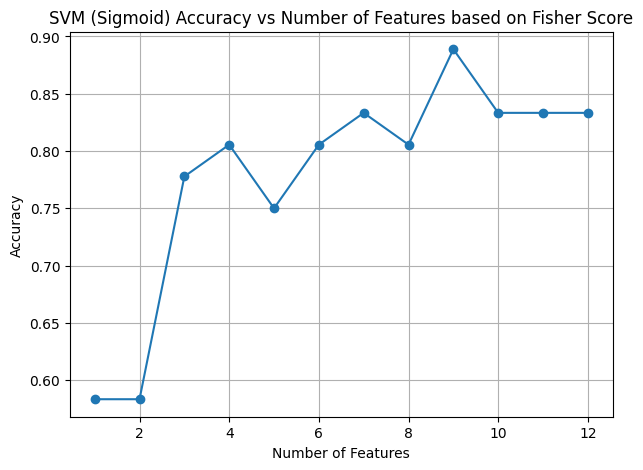

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

# === 1. Baca dataset ===
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

# === 2. Hapus kolom non-numerik dan non-fitur ===
non_features = ['filename', 'age', 'sex', 'hand', 'count']
df = df.drop(columns=[col for col in non_features if col in df.columns], errors='ignore')

# === 3. Drop baris tanpa label diagnosis ===
df = df.dropna(subset=['diag'])

# === 4. Pastikan 'diag' numerik ===
if df['diag'].dtype == object:
    df['diag'] = df['diag'].astype('category').cat.codes

# === 5. Pilih fitur numerik (selain target) ===
feature_cols = [c for c in df.columns if c != 'diag' and np.issubdtype(df[c].dtype, np.number)]

# === 6. Fungsi Fisher Score ===
def fisher_score(feature, labels):
    classes = np.unique(labels)
    overall_mean = np.mean(feature)
    numerator = 0
    denominator = 0
    for c in classes:
        feature_c = feature[labels == c]
        n_c = len(feature_c)
        mean_c = np.mean(feature_c)
        var_c = np.var(feature_c)
        numerator += n_c * (mean_c - overall_mean)**2
        denominator += n_c * var_c
    if denominator == 0:
        return 0
    return numerator / denominator

# === 7. Hitung Fisher Score untuk semua fitur ===
fisher_scores = []
for f in feature_cols:
    score = fisher_score(df[f].values, df['diag'].values)
    fisher_scores.append({'feature': f, 'score': score})

fisher_df = pd.DataFrame(fisher_scores).sort_values(by='score', ascending=False)
sorted_features = fisher_df['feature'].tolist()

# === 8. Seleksi Fitur Adaptif berdasarkan Fisher Score ===
best_acc = 0.0
best_features = []
no_improve_count = 0
max_no_improve = 2

acc_list = []
features_history = []

selected_features = []

for feat in sorted_features:
    selected_features.append(feat)
    features_history.append(selected_features.copy())

    X = df[selected_features]
    y = df['diag']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Standarisasi untuk SVM
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Latih SVM
    model = SVC(kernel='sigmoid', gamma='scale', coef0=0, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

    print(f"> Menambahkan fitur: {feat}")
    print(f"  Jumlah fitur sekarang: {len(selected_features)} | Akurasi: {acc:.4f}")

    # Cek peningkatan akurasi
    if acc > best_acc:
        best_acc = acc
        best_features = selected_features.copy()
        no_improve_count = 0
    elif acc == best_acc:
        if len(selected_features) < len(best_features):
            best_features = selected_features.copy()
        no_improve_count += 1
    else:
        no_improve_count += 1

    if no_improve_count > max_no_improve:
        print("⛔ Akurasi tidak meningkat selama", max_no_improve, "iterasi. Proses dihentikan.")
        break

# === 9. Tampilkan Hasil Seleksi ===
print("\n✅ Seleksi Fitur Fisher selesai.")
print("Fitur terbaik:")
print(best_features)
print("Akurasi terbaik:", round(best_acc, 4))

# === 10. Evaluasi akhir dengan fitur terbaik ===
X_final = df[best_features]
y = df['diag']
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_final = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_final.fit(X_train_scaled, y_train)
y_pred_final = svm_final.predict(X_test_scaled)

print("\n=== Classification Report Akhir ===")
print(classification_report(y_test, y_pred_final))

# === 11. Visualisasi Akurasi ===
plt.figure(figsize=(7,5))
plt.plot(range(1, len(acc_list)+1), acc_list, marker='o', linestyle='-')
plt.title('SVM (Sigmoid) Accuracy vs Number of Features based on Fisher Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

> Menambahkan fitur: max_lentotal
  Jumlah fitur sekarang: 1 | Akurasi: 0.5833
> Menambahkan fitur: max_lenx
  Jumlah fitur sekarang: 2 | Akurasi: 0.5833
> Menambahkan fitur: median_y
  Jumlah fitur sekarang: 3 | Akurasi: 0.7778
> Menambahkan fitur: mean_y
  Jumlah fitur sekarang: 4 | Akurasi: 0.8056
> Menambahkan fitur: total_length
  Jumlah fitur sekarang: 5 | Akurasi: 0.7500
> Menambahkan fitur: std_lentotal
  Jumlah fitur sekarang: 6 | Akurasi: 0.8056
> Menambahkan fitur: std_lenx
  Jumlah fitur sekarang: 7 | Akurasi: 0.8333
> Menambahkan fitur: std_duration
  Jumlah fitur sekarang: 8 | Akurasi: 0.8056
> Menambahkan fitur: var_y
  Jumlah fitur sekarang: 9 | Akurasi: 0.8889
> Menambahkan fitur: max_duration
  Jumlah fitur sekarang: 10 | Akurasi: 0.8333
> Menambahkan fitur: mean_duration
  Jumlah fitur sekarang: 11 | Akurasi: 0.8333
> Menambahkan fitur: total_duration
  Jumlah fitur sekarang: 12 | Akurasi: 0.8333
⛔ Akurasi tidak meningkat selama 2 iterasi. Proses dihentikan.

✅ Selek

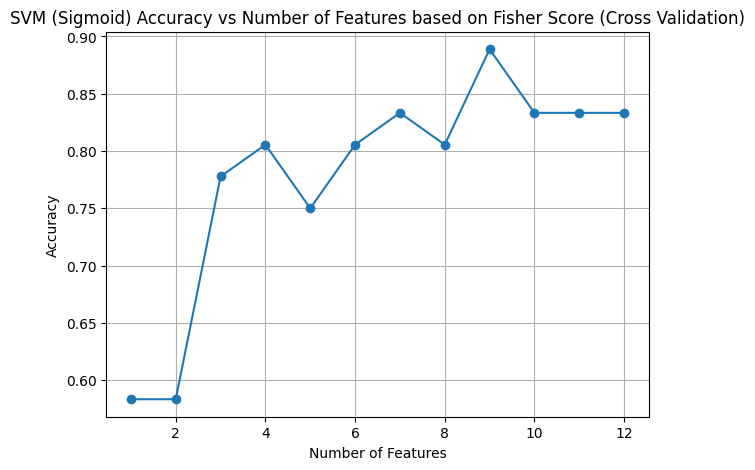

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

# === 1. Baca dataset ===
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

# === 2. Hapus kolom non-numerik dan non-fitur ===
non_features = ['filename', 'age', 'sex', 'hand', 'count']
df = df.drop(columns=[col for col in non_features if col in df.columns], errors='ignore')

# === 3. Drop baris tanpa label diagnosis ===
df = df.dropna(subset=['diag'])

# === 4. Pastikan 'diag' numerik ===
if df['diag'].dtype == object:
    df['diag'] = df['diag'].astype('category').cat.codes

# === 5. Pilih fitur numerik (selain target) ===
feature_cols = [c for c in df.columns if c != 'diag' and np.issubdtype(df[c].dtype, np.number)]

# === 6. Fungsi Fisher Score ===
def fisher_score(feature, labels):
    classes = np.unique(labels)
    overall_mean = np.mean(feature)
    numerator = 0
    denominator = 0
    for c in classes:
        feature_c = feature[labels == c]
        n_c = len(feature_c)
        mean_c = np.mean(feature_c)
        var_c = np.var(feature_c)
        numerator += n_c * (mean_c - overall_mean)**2
        denominator += n_c * var_c
    if denominator == 0:
        return 0
    return numerator / denominator

# === 7. Hitung Fisher Score untuk semua fitur ===
fisher_scores = []
for f in feature_cols:
    score = fisher_score(df[f].values, df['diag'].values)
    fisher_scores.append({'feature': f, 'score': score})

fisher_df = pd.DataFrame(fisher_scores).sort_values(by='score', ascending=False)
sorted_features = fisher_df['feature'].tolist()

# === 8. Seleksi Fitur Adaptif berdasarkan Fisher Score ===
best_acc = 0.0
best_features = []
no_improve_count = 0
max_no_improve = 2

acc_list = []
features_history = []

selected_features = []

for feat in sorted_features:
    selected_features.append(feat)
    features_history.append(selected_features.copy())

    X = df[selected_features]
    y = df['diag']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Standarisasi untuk SVM
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Latih SVM dengan kernel Sigmoid
    model = SVC(kernel='sigmoid', gamma='scale', coef0=0, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

    print(f"> Menambahkan fitur: {feat}")
    print(f"  Jumlah fitur sekarang: {len(selected_features)} | Akurasi: {acc:.4f}")

    # Cek peningkatan akurasi
    if acc > best_acc:
        best_acc = acc
        best_features = selected_features.copy()
        no_improve_count = 0
    elif acc == best_acc:
        if len(selected_features) < len(best_features):
            best_features = selected_features.copy()
        no_improve_count += 1
    else:
        no_improve_count += 1

    if no_improve_count > max_no_improve:
        print("⛔ Akurasi tidak meningkat selama", max_no_improve, "iterasi. Proses dihentikan.")
        break

# === 9. Tampilkan Hasil Seleksi ===
print("\n✅ Seleksi Fitur Fisher selesai.")
print("Fitur terbaik:")
print(best_features)
print("Akurasi terbaik:", round(best_acc, 4))

# === 10. Evaluasi akhir dengan fitur terbaik ===
X_final = df[best_features]
y = df['diag']
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Cross-validation ---
# Menggunakan KFold cross-validation untuk model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Menghitung cross-validation score dengan model SVM
svm_model = SVC(kernel='sigmoid', gamma='scale', coef0=0, random_state=42)
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

# Menampilkan hasil cross-validation
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")

# Latih model dengan fitur terbaik pada seluruh data pelatihan
svm_final = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_final.fit(X_train_scaled, y_train)
y_pred_final = svm_final.predict(X_test_scaled)

print("\n=== Classification Report Akhir ===")
print(classification_report(y_test, y_pred_final))

# === 11. Visualisasi Akurasi ===
plt.figure(figsize=(7,5))
plt.plot(range(1, len(acc_list)+1), acc_list, marker='o', linestyle='-')
plt.title('SVM (Sigmoid) Accuracy vs Number of Features based on Fisher Score (Cross Validation)')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


SVM (LINIER)

> Menambahkan fitur: max_lentotal
  Jumlah fitur sekarang: 1 | Akurasi: 0.5833
> Menambahkan fitur: max_lenx
  Jumlah fitur sekarang: 2 | Akurasi: 0.5833
> Menambahkan fitur: median_y
  Jumlah fitur sekarang: 3 | Akurasi: 0.7778
> Menambahkan fitur: mean_y
  Jumlah fitur sekarang: 4 | Akurasi: 0.8333
> Menambahkan fitur: total_length
  Jumlah fitur sekarang: 5 | Akurasi: 0.8333
> Menambahkan fitur: std_lentotal
  Jumlah fitur sekarang: 6 | Akurasi: 0.8333
> Menambahkan fitur: std_lenx
  Jumlah fitur sekarang: 7 | Akurasi: 0.8611
> Menambahkan fitur: std_duration
  Jumlah fitur sekarang: 8 | Akurasi: 0.8611
> Menambahkan fitur: var_y
  Jumlah fitur sekarang: 9 | Akurasi: 0.7778
> Menambahkan fitur: max_duration
  Jumlah fitur sekarang: 10 | Akurasi: 0.7778
⛔ Akurasi tidak meningkat selama 2 iterasi. Proses dihentikan.

✅ Seleksi Fitur Fisher selesai.
Fitur terbaik:
['max_lentotal', 'max_lenx', 'median_y', 'mean_y', 'total_length', 'std_lentotal', 'std_lenx']
Akurasi terbaik: 0.8611

===

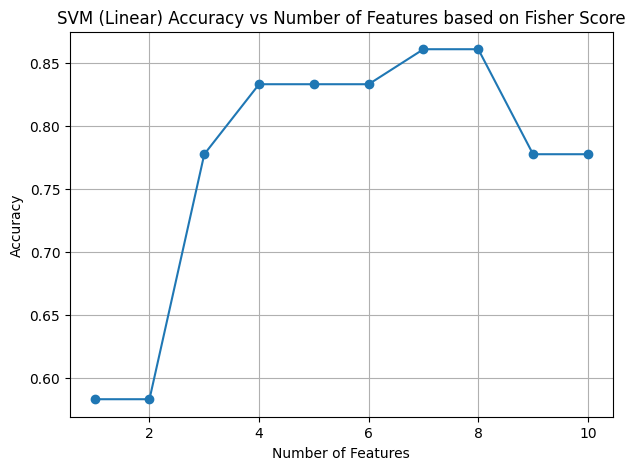

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

# === 1. Baca dataset ===
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

# === 2. Hapus kolom non-numerik dan non-fitur ===
non_features = ['filename', 'age', 'sex', 'hand', 'count']
df = df.drop(columns=[col for col in non_features if col in df.columns], errors='ignore')

# === 3. Drop baris tanpa label diagnosis ===
df = df.dropna(subset=['diag'])

# === 4. Pastikan 'diag' numerik ===
if df['diag'].dtype == object:
    df['diag'] = df['diag'].astype('category').cat.codes

# === 5. Pilih fitur numerik (selain target) ===
feature_cols = [c for c in df.columns if c != 'diag' and np.issubdtype(df[c].dtype, np.number)]

# === 6. Fungsi Fisher Score ===
def fisher_score(feature, labels):
    classes = np.unique(labels)
    overall_mean = np.mean(feature)
    numerator = 0
    denominator = 0
    for c in classes:
        feature_c = feature[labels == c]
        n_c = len(feature_c)
        mean_c = np.mean(feature_c)
        var_c = np.var(feature_c)
        numerator += n_c * (mean_c - overall_mean)**2
        denominator += n_c * var_c
    if denominator == 0:
        return 0
    return numerator / denominator

# === 7. Hitung Fisher Score untuk semua fitur ===
fisher_scores = []
for f in feature_cols:
    score = fisher_score(df[f].values, df['diag'].values)
    fisher_scores.append({'feature': f, 'score': score})

fisher_df = pd.DataFrame(fisher_scores).sort_values(by='score', ascending=False)
sorted_features = fisher_df['feature'].tolist()

# === 8. Seleksi Fitur Adaptif berdasarkan Fisher Score ===
best_acc = 0.0
best_features = []
no_improve_count = 0
max_no_improve = 2

acc_list = []
features_history = []

selected_features = []

for feat in sorted_features:
    selected_features.append(feat)
    features_history.append(selected_features.copy())

    X = df[selected_features]
    y = df['diag']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Standarisasi untuk SVM
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Latih SVM
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

    print(f"> Menambahkan fitur: {feat}")
    print(f"  Jumlah fitur sekarang: {len(selected_features)} | Akurasi: {acc:.4f}")

    # Cek peningkatan akurasi
    if acc > best_acc:
        best_acc = acc
        best_features = selected_features.copy()
        no_improve_count = 0
    elif acc == best_acc:
        if len(selected_features) < len(best_features):
            best_features = selected_features.copy()
        no_improve_count += 1
    else:
        no_improve_count += 1

    if no_improve_count > max_no_improve:
        print("⛔ Akurasi tidak meningkat selama", max_no_improve, "iterasi. Proses dihentikan.")
        break

# === 9. Tampilkan Hasil Seleksi ===
print("\n✅ Seleksi Fitur Fisher selesai.")
print("Fitur terbaik:")
print(best_features)
print("Akurasi terbaik:", round(best_acc, 4))

# === 10. Evaluasi akhir dengan fitur terbaik ===
X_final = df[best_features]
y = df['diag']
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_final = SVC(kernel='linear', random_state=42)
svm_final.fit(X_train_scaled, y_train)
y_pred_final = svm_final.predict(X_test_scaled)

print("\n=== Classification Report Akhir ===")
print(classification_report(y_test, y_pred_final))

# === 11. Visualisasi Akurasi ===
plt.figure(figsize=(7,5))
plt.plot(range(1, len(acc_list)+1), acc_list, marker='o', linestyle='-')
plt.title('SVM (Linear) Accuracy vs Number of Features based on Fisher Score')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

FEATURE REDUKSI FISHER LDA

Bentuk data sebelum LDA: (83, 109)
Bentuk data setelah LDA: (83, 1)


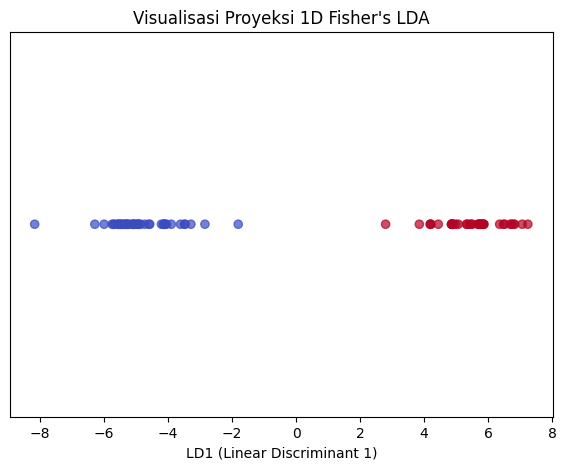


=== SVM (RBF) ===
              precision    recall  f1-score   support

         0.0       0.57      0.63      0.60        19
         1.0       0.53      0.47      0.50        17

    accuracy                           0.56        36
   macro avg       0.55      0.55      0.55        36
weighted avg       0.55      0.56      0.55        36

Akurasi: 0.5556

=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.59      0.53      0.56        19
         1.0       0.53      0.59      0.56        17

    accuracy                           0.56        36
   macro avg       0.56      0.56      0.56        36
weighted avg       0.56      0.56      0.56        36

Akurasi: 0.5556

=== AdaBoost ===
              precision    recall  f1-score   support

         0.0       0.59      0.53      0.56        19
         1.0       0.53      0.59      0.56        17

    accuracy                           0.56        36
   macro avg       0.56      0.56   

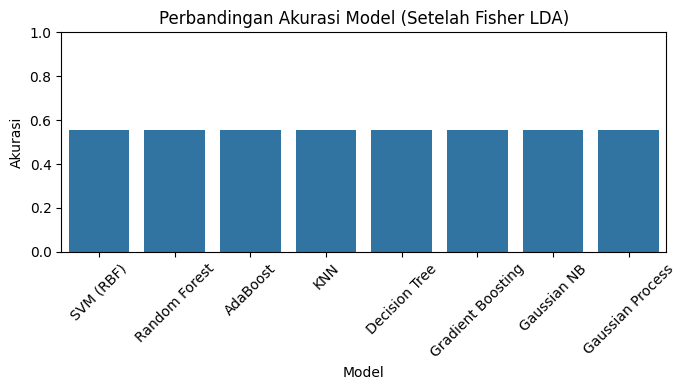


=== Ringkasan Akurasi ===
               Model   Akurasi
0          SVM (RBF)  0.555556
1      Random Forest  0.555556
2           AdaBoost  0.555556
3                KNN  0.555556
4      Decision Tree  0.555556
5  Gradient Boosting  0.555556
6        Gaussian NB  0.555556
7   Gaussian Process  0.555556


In [ ]:
# === IMPORT LIBRARY ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier

# === 1. Baca dataset ===
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

# === 2. Hapus kolom non-numerik dan non-fitur ===
non_features = ['filename', 'age', 'sex', 'hand', 'count']
df = df.drop(columns=[col for col in non_features if col in df.columns], errors='ignore')

# === 3. Drop baris tanpa label diagnosis ===
df = df.dropna(subset=['diag'])

# === 4. Pastikan 'diag' numerik ===
if df['diag'].dtype == object:
    df['diag'] = df['diag'].astype('category').cat.codes

# === 5. Pilih fitur numerik (selain target) ===
feature_cols = [c for c in df.columns if c != 'diag' and np.issubdtype(df[c].dtype, np.number)]

X = df[feature_cols]
y = df['diag']

# === 6. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === 7. Standarisasi data ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 8. Reduksi dimensi dengan Fisher’s Linear Discriminant (LDA) ===
lda = LinearDiscriminantAnalysis(n_components=1)  # bisa juga = jumlah kelas - 1
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

print(f"Bentuk data sebelum LDA: {X_train_scaled.shape}")
print(f"Bentuk data setelah LDA: {X_train_lda.shape}")

# === 9. Visualisasi hasil proyeksi LDA ===
plt.figure(figsize=(7,5))
plt.scatter(X_train_lda[:,0], np.zeros_like(X_train_lda), c=y_train, cmap='coolwarm', alpha=0.7)
plt.title("Visualisasi Proyeksi 1D Fisher's LDA")
plt.xlabel("LD1 (Linear Discriminant 1)")
plt.yticks([])
plt.show()

# === 10. Gunakan hasil reduksi LDA untuk klasifikasi ===
models = {
    'SVM (RBF)': SVC(kernel='rbf', gamma='scale', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Gaussian NB': GaussianNB(),
    'Gaussian Process': GaussianProcessClassifier(random_state=42)
}

acc_results = []

for name, model in models.items():
    model.fit(X_train_lda, y_train)
    y_pred = model.predict(X_test_lda)
    acc = accuracy_score(y_test, y_pred)
    acc_results.append({'Model': name, 'Akurasi': acc})
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print(f"Akurasi: {acc:.4f}")

# === 11. Bandingkan Akurasi ===
acc_df = pd.DataFrame(acc_results)
plt.figure(figsize=(7,4))
sns.barplot(data=acc_df, x='Model', y='Akurasi')
plt.title('Perbandingan Akurasi Model (Setelah Fisher LDA)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

print("\n=== Ringkasan Akurasi ===")
print(acc_df.sort_values(by='Akurasi', ascending=False))


FITUR REDUKSI DENGAN PCA

Bentuk data sebelum PCA: (83, 109)
Bentuk data setelah PCA: (83, 2)


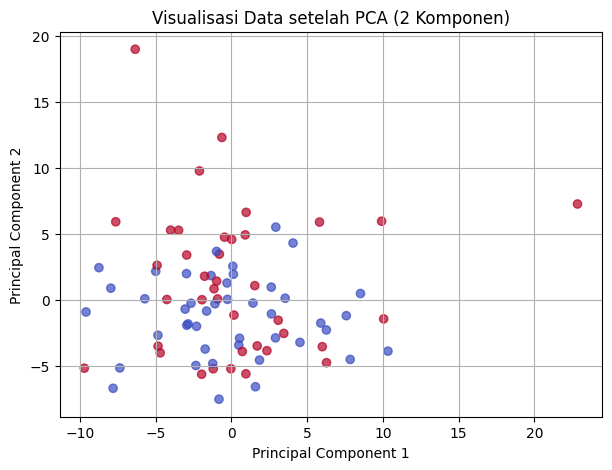


=== SVM (RBF) ===
              precision    recall  f1-score   support

         0.0       0.53      0.84      0.65        19
         1.0       0.50      0.18      0.26        17

    accuracy                           0.53        36
   macro avg       0.52      0.51      0.46        36
weighted avg       0.52      0.53      0.47        36

Akurasi: 0.5278

=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.43      0.47      0.45        19
         1.0       0.33      0.29      0.31        17

    accuracy                           0.39        36
   macro avg       0.38      0.38      0.38        36
weighted avg       0.38      0.39      0.39        36

Akurasi: 0.3889

=== AdaBoost ===
              precision    recall  f1-score   support

         0.0       0.44      0.58      0.50        19
         1.0       0.27      0.18      0.21        17

    accuracy                           0.39        36
   macro avg       0.36      0.38   

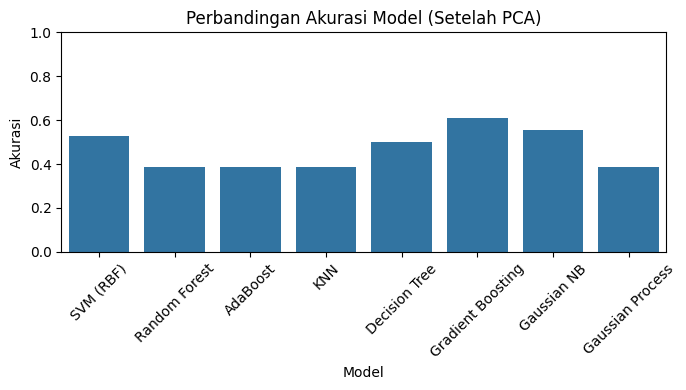


=== Ringkasan Akurasi ===
               Model   Akurasi
5  Gradient Boosting  0.611111
6        Gaussian NB  0.555556
0          SVM (RBF)  0.527778
4      Decision Tree  0.500000
3                KNN  0.388889
2           AdaBoost  0.388889
1      Random Forest  0.388889
7   Gaussian Process  0.388889


In [ ]:
# === IMPORT LIBRARY ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier

# === 1. Baca dataset ===
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

# === 2. Hapus kolom non-fitur ===
non_features = ['filename', 'age', 'sex', 'hand', 'count']
df = df.drop(columns=[col for col in non_features if col in df.columns], errors='ignore')

# === 3. Pastikan kolom label 'diag' ada dan tidak kosong ===
df = df.dropna(subset=['diag'])

# === 4. Ubah label ke numerik (jika masih teks) ===
if df['diag'].dtype == object:
    df['diag'] = df['diag'].astype('category').cat.codes

# === 5. Pisahkan fitur dan label ===
feature_cols = [c for c in df.columns if c != 'diag' and np.issubdtype(df[c].dtype, np.number)]
X = df[feature_cols]
y = df['diag']

# === 6. Split data train-test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === 7. Standarisasi data ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 8. Reduksi Dimensi dengan PCA ===
# (ubah n_components untuk coba 2D, 3D, dst.)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Bentuk data sebelum PCA: {X_train_scaled.shape}")
print(f"Bentuk data setelah PCA: {X_train_pca.shape}")

# === 9. Visualisasi PCA 2D ===
plt.figure(figsize=(7,5))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title("Visualisasi Data setelah PCA (2 Komponen)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# === 10. Latih berbagai model pada hasil PCA ===
models = {
    'SVM (RBF)': SVC(kernel='rbf', gamma='scale', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Gaussian NB': GaussianNB(),
    'Gaussian Process': GaussianProcessClassifier(random_state=42)
}

acc_results = []

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    acc_results.append({'Model': name, 'Akurasi': acc})
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print(f"Akurasi: {acc:.4f}")

# === 11. Bandingkan Akurasi ===
acc_df = pd.DataFrame(acc_results)
plt.figure(figsize=(7,4))
sns.barplot(data=acc_df, x='Model', y='Akurasi')
plt.title('Perbandingan Akurasi Model (Setelah PCA)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

print("\n=== Ringkasan Akurasi ===")
print(acc_df.sort_values(by='Akurasi', ascending=False))


Analisa Komponen PCA

Komponen PCA:  1 | Akurasi: 0.5278 | Variansi: 0.2797
Komponen PCA:  2 | Akurasi: 0.5278 | Variansi: 0.4978
Komponen PCA:  3 | Akurasi: 0.6944 | Variansi: 0.5979
Komponen PCA:  4 | Akurasi: 0.6389 | Variansi: 0.6555
Komponen PCA:  5 | Akurasi: 0.6389 | Variansi: 0.6990
Komponen PCA:  6 | Akurasi: 0.6667 | Variansi: 0.7322
Komponen PCA:  7 | Akurasi: 0.6667 | Variansi: 0.7625
Komponen PCA:  8 | Akurasi: 0.6944 | Variansi: 0.7904
Komponen PCA:  9 | Akurasi: 0.7778 | Variansi: 0.8172
Komponen PCA: 10 | Akurasi: 0.7778 | Variansi: 0.8391
Komponen PCA: 11 | Akurasi: 0.7778 | Variansi: 0.8576
Komponen PCA: 12 | Akurasi: 0.7500 | Variansi: 0.8724
Komponen PCA: 13 | Akurasi: 0.7778 | Variansi: 0.8869
Komponen PCA: 14 | Akurasi: 0.7222 | Variansi: 0.8988
Komponen PCA: 15 | Akurasi: 0.7500 | Variansi: 0.9102
Komponen PCA: 16 | Akurasi: 0.7500 | Variansi: 0.9200
Komponen PCA: 17 | Akurasi: 0.7500 | Variansi: 0.9283
Komponen PCA: 18 | Akurasi: 0.7500 | Variansi: 0.9366
Komponen PCA: 19 | Akurasi: 

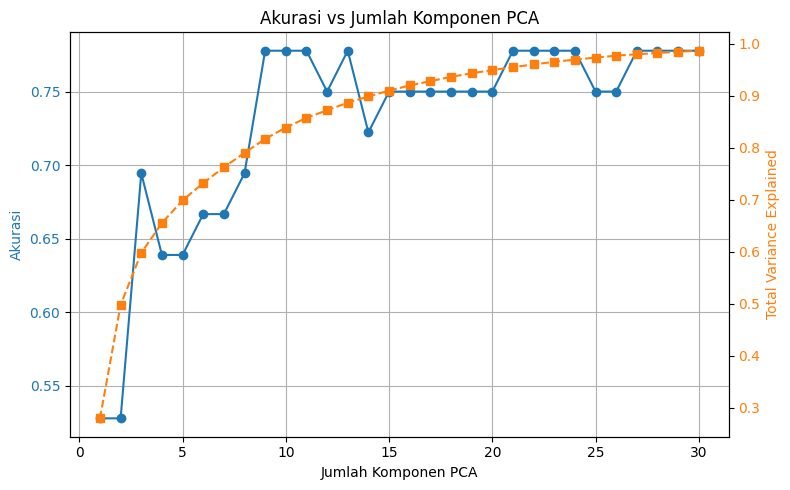


✅ Jumlah komponen terbaik: 9
Akurasi terbaik: 0.7778
Variansi total pada komponen tersebut: 0.8172


In [ ]:
# === IMPORT LIBRARY ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# === 1. Baca dataset ===
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

# === 2. Hapus kolom non-fitur ===
non_features = ['filename', 'age', 'sex', 'hand', 'count']
df = df.drop(columns=[col for col in non_features if col in df.columns], errors='ignore')

# === 3. Pastikan label 'diag' ada dan tidak kosong ===
df = df.dropna(subset=['diag'])

# === 4. Ubah label ke numerik jika perlu ===
if df['diag'].dtype == object:
    df['diag'] = df['diag'].astype('category').cat.codes

# === 5. Pisahkan fitur dan label ===
feature_cols = [c for c in df.columns if c != 'diag' and np.issubdtype(df[c].dtype, np.number)]
X = df[feature_cols]
y = df['diag']

# === 6. Split data train-test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === 7. Standarisasi data ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 8. Looping jumlah komponen PCA ===
n_features = X_train_scaled.shape[1]
max_components = min(30, n_features)  # batas maksimum (misal 30 atau jumlah fitur)
acc_list = []
var_explained = []

for n in range(1, max_components + 1):
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Hitung variansi yang dijelaskan
    var_explained.append(np.sum(pca.explained_variance_ratio_))

    # Latih model (gunakan SVM untuk contoh ini)
    model = SVC(kernel='rbf', gamma='scale', random_state=42)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

    print(f"Komponen PCA: {n:2d} | Akurasi: {acc:.4f} | Variansi: {np.sum(pca.explained_variance_ratio_):.4f}")

# === 9. Visualisasi Akurasi vs Komponen ===
fig, ax1 = plt.subplots(figsize=(8,5))

color1 = 'tab:blue'
ax1.set_xlabel('Jumlah Komponen PCA')
ax1.set_ylabel('Akurasi', color=color1)
ax1.plot(range(1, max_components + 1), acc_list, color=color1, marker='o', label='Akurasi')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True)

# Tambahkan sumbu kedua untuk variansi
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('Total Variance Explained', color=color2)
ax2.plot(range(1, max_components + 1), var_explained, color=color2, marker='s', linestyle='--', label='Explained Variance')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Akurasi vs Jumlah Komponen PCA')
fig.tight_layout()
plt.show()

# === 10. Tentukan komponen terbaik ===
best_idx = np.argmax(acc_list)
print(f"\n✅ Jumlah komponen terbaik: {best_idx+1}")
print(f"Akurasi terbaik: {acc_list[best_idx]:.4f}")
print(f"Variansi total pada komponen tersebut: {var_explained[best_idx]:.4f}")


Bentuk data sebelum PCA: (83, 109)
Bentuk data setelah PCA: (83, 9)


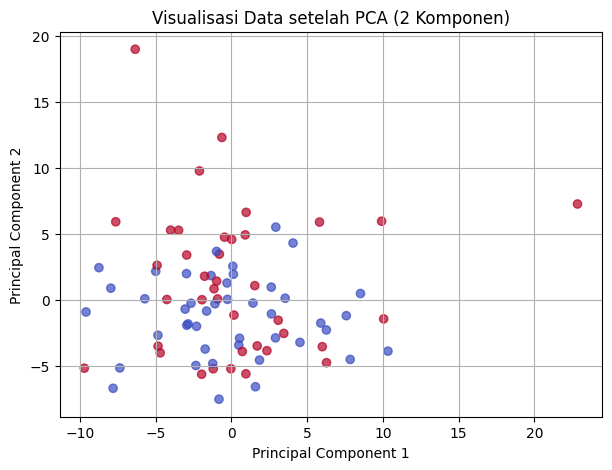


=== SVM (RBF) ===
              precision    recall  f1-score   support

         0.0       0.72      0.95      0.82        19
         1.0       0.91      0.59      0.71        17

    accuracy                           0.78        36
   macro avg       0.81      0.77      0.77        36
weighted avg       0.81      0.78      0.77        36

Akurasi: 0.7778

=== Random Forest ===
              precision    recall  f1-score   support

         0.0       0.71      0.53      0.61        19
         1.0       0.59      0.76      0.67        17

    accuracy                           0.64        36
   macro avg       0.65      0.65      0.64        36
weighted avg       0.66      0.64      0.63        36

Akurasi: 0.6389

=== AdaBoost ===
              precision    recall  f1-score   support

         0.0       0.75      0.63      0.69        19
         1.0       0.65      0.76      0.70        17

    accuracy                           0.69        36
   macro avg       0.70      0.70   

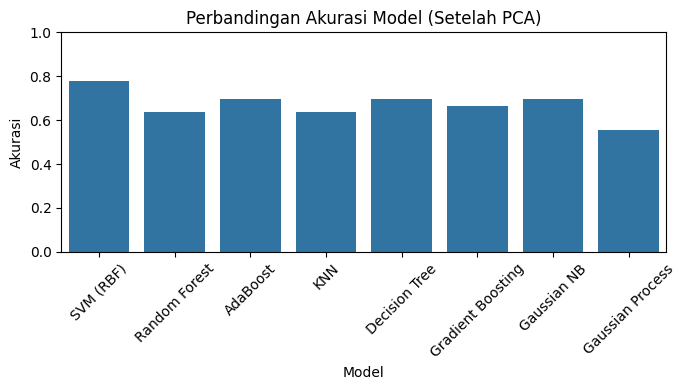


=== Ringkasan Akurasi ===
               Model   Akurasi
0          SVM (RBF)  0.777778
2           AdaBoost  0.694444
6        Gaussian NB  0.694444
4      Decision Tree  0.694444
5  Gradient Boosting  0.666667
1      Random Forest  0.638889
3                KNN  0.638889
7   Gaussian Process  0.555556


In [ ]:
# === IMPORT LIBRARY ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier

# === 1. Baca dataset ===
df = pd.read_csv("/content/drive/MyDrive/DysgraphiaDB1/onlineHWfeature.csv")

# === 2. Hapus kolom non-fitur ===
non_features = ['filename', 'age', 'sex', 'hand', 'count']
df = df.drop(columns=[col for col in non_features if col in df.columns], errors='ignore')

# === 3. Pastikan kolom label 'diag' ada dan tidak kosong ===
df = df.dropna(subset=['diag'])

# === 4. Ubah label ke numerik (jika masih teks) ===
if df['diag'].dtype == object:
    df['diag'] = df['diag'].astype('category').cat.codes

# === 5. Pisahkan fitur dan label ===
feature_cols = [c for c in df.columns if c != 'diag' and np.issubdtype(df[c].dtype, np.number)]
X = df[feature_cols]
y = df['diag']

# === 6. Split data train-test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === 7. Standarisasi data ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 8. Reduksi Dimensi dengan PCA ===
# (ubah n_components untuk coba 2D, 3D, dst.)
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Bentuk data sebelum PCA: {X_train_scaled.shape}")
print(f"Bentuk data setelah PCA: {X_train_pca.shape}")

# === 9. Visualisasi PCA 2D ===
plt.figure(figsize=(7,5))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title("Visualisasi Data setelah PCA (2 Komponen)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# === 10. Latih berbagai model pada hasil PCA ===
models = {
    'SVM (RBF)': SVC(kernel='rbf', gamma='scale', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Gaussian NB': GaussianNB(),
    'Gaussian Process': GaussianProcessClassifier(random_state=42)
}

acc_results = []

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    acc_results.append({'Model': name, 'Akurasi': acc})
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print(f"Akurasi: {acc:.4f}")

# === 11. Bandingkan Akurasi ===
acc_df = pd.DataFrame(acc_results)
plt.figure(figsize=(7,4))
sns.barplot(data=acc_df, x='Model', y='Akurasi')
plt.title('Perbandingan Akurasi Model (Setelah PCA)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

print("\n=== Ringkasan Akurasi ===")
print(acc_df.sort_values(by='Akurasi', ascending=False))


Fisher